In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Column Informaiton:
|Column Name|Column Description|
|-----|-----|
|age|age in years|
|sex|(1 = male; 0 = female)|
|cp|chest pain type|
|trestbpss|resting blood pressure (in mm Hg on admission to the hospital)|
|chol|serum cholestoral in mg/dl|
|fbs|fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false)|
|restecg|resting electrocardiographic results|
|thalach|maximum heart rate achieved|
|exang|exercise induced angina (1 = yes; 0 = no)|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|the slope of the peak exercise ST segment|
|ca|number of major vessels (0-3) colored by flourosopy|
|thal|3 = normal; 6 = fixed defect; 7 = reversable defect|
|target*|1 = has heart disease; 0 = doesnt have heart disease|

## Renaming Columns
|Original Name|New Name|Reason for Changing|
|-----|-----|-----|
|sex|is_male|to make is easies to know the gender|
|cp|chest_pain|make the column name more specific|
|trestbpss|resting_bp|makes the column name more informative to those without domain knowledge|
|chol|cholestoral|make the column name more specific|
|fbs|blood_sugar_above_120|make the column name more specific|
|restecg|resting_electocardio|makes the column name more informative to those without domain knowledge|
|thalach|max_heart_rate|makes the column name more informative to those without domain knowledge|
|exang|exercise_angina|makes the column name more informative to those without domain knowledge|
|oldpeak|rest_angina|makes the column name more informative to those without domain knowledge|
|ca|count_major_vessels|makes the column name more informative to those without domain knowledge|
|thal|defect_type|makes the column name more informative to those without domain knowledge|
|target|has_heart_disease|make the column name more specific|

In [3]:
df.columns = ['age','is_male', 'chest_pain', 'resting_bp', 'cholestoral', 'blood_sugar_above_120', 
              'resting_electocardio', 'max_heart_rate', 'exercise_angina', 'rest_angina', 'slope',
              'count_major_vessels', 'defect_type', 'has_heart_disease']

In [4]:
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,slope,count_major_vessels,defect_type,has_heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Continous or Categorical Feature
|Column Name|Continuous or Categorical|
|-----|-----|
|age|Continuous|
|is_male|Categorical|
|chest_pain|Categorical|
|resting_bp|Continuous|
|cholestoral|Continuous|
|blood_sugar_above_120|Categorical|
|max_heart_rate|Continuous|
|exercise_angina|Categorical|
|rest_angina|Continuous|
|slope|Categorical|
|count_major_vessels|Categorical|
|defect_type|Categorical|
|has_heart_disease|Categorical|

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    303 non-null    int64  
 1   is_male                303 non-null    int64  
 2   chest_pain             303 non-null    int64  
 3   resting_bp             303 non-null    int64  
 4   cholestoral            303 non-null    int64  
 5   blood_sugar_above_120  303 non-null    int64  
 6   resting_electocardio   303 non-null    int64  
 7   max_heart_rate         303 non-null    int64  
 8   exercise_angina        303 non-null    int64  
 9   rest_angina            303 non-null    float64
 10  slope                  303 non-null    int64  
 11  count_major_vessels    303 non-null    int64  
 12  defect_type            303 non-null    int64  
 13  has_heart_disease      303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Create Ratio Features

Ratios I plan to make:
- Age:Chest Pain
- Age:Cholestoral
- Age:Heart Rate
- Cholesterol:Chest Pain
- Cholestoral:Heart Rate
- Chest Pain:Heart Rate

In [6]:
df['chest_age_ratio'] = df.chest_pain/df.age


In [7]:
df['age_chol_ratio'] = df.age/df.cholestoral


In [8]:
df['age_heart_ratio'] = df.age/df.max_heart_rate


In [9]:
df['chest_chol_ratio'] = df.chest_pain/df.cholestoral


In [10]:
df['chol_heart_ratio'] = df.cholestoral/df.max_heart_rate


In [11]:
df['chest_heart_ratio'] = df.chest_pain/df.max_heart_rate


In [12]:
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,slope,count_major_vessels,defect_type,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.047619,0.270386,0.420000,0.012876,1.553333,0.020000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.054054,0.148000,0.197861,0.008000,1.336898,0.010695
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.024390,0.200980,0.238372,0.004902,1.186047,0.005814
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.017857,0.237288,0.314607,0.004237,1.325843,0.005618
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.000000,0.161017,0.349693,0.000000,2.171779,0.000000


## Bin Some Larger Data to Help Visuals

In [13]:
df['age_groups'] = pd.cut(df.age, 
                            bins = [29,35,40,45,50,55,60,65,70,75,80],
                            labels = ['Below 35', '35-40', '40-45', "45-50", 
                                      "50-55", '55-60', '60-65', '65-70', 
                                      '70-75', '75-80'])

In [14]:
df['levels_of_chol'] = pd.cut(df.cholestoral, 
                            bins = [0,200,240,800],
                            labels = ['Desireable', 'Boarderline High', 'High'])

In [15]:
df['heart_rate_levels'] = pd.cut(df.max_heart_rate, 
                            bins = [0,120,130,140,180,250],
                            labels = ['Normal', 'Elevated', 'High Stage 1', 
                                      'High Stage 2', 'Hypertensive Crisis'])

In [16]:
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0.047619,0.270386,0.420000,0.012876,1.553333,0.020000,60-65,Boarderline High,High Stage 2
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0.054054,0.148000,0.197861,0.008000,1.336898,0.010695,35-40,High,Hypertensive Crisis
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0.024390,0.200980,0.238372,0.004902,1.186047,0.005814,40-45,Boarderline High,High Stage 2
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0.017857,0.237288,0.314607,0.004237,1.325843,0.005618,55-60,Boarderline High,High Stage 2
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0.000000,0.161017,0.349693,0.000000,2.171779,0.000000,55-60,High,High Stage 2


## Create Functions to Clean

In [17]:
def acquire_heart():
    '''Takes the heart disease CSV
    turns csv into a readable pandas dataframe'''
    # Get the csv
    df = pd.read_csv('heart.csv')
    # return pandas df
    return df

In [18]:
df = acquire_heart()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
def rename_features(df):
    '''Takes pandas dataframe and renames columns'''
    # rename all columns
    df.columns = ['age','is_male', 'chest_pain', 'resting_bp', 'cholestoral', 'blood_sugar_above_120', 
              'resting_electocardio', 'max_heart_rate', 'exercise_angina', 'rest_angina', 'slope',
              'count_major_vessels', 'defect_type', 'has_heart_disease']
    return df

In [20]:
df = rename_features(df)
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,slope,count_major_vessels,defect_type,has_heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
def create_features(df):
    '''Takes in df
    creates new features for ratios 
    between chest pain, age, heart rate, and cholestoral'''
    # chest pain and age ratio
    df['chest_age_ratio'] = df.chest_pain/df.age
    # age and cholestoral ratio
    df['age_chol_ratio'] = df.age/df.cholestoral
    # age and heart rate ratio
    df['age_heart_ratio'] = df.age/df.max_heart_rate
    # chest pain and cholestoral ratio
    df['chest_chol_ratio'] = df.chest_pain/df.cholestoral
    # cholestoral and heart rate ratio
    df['chol_heart_ratio'] = df.cholestoral/df.max_heart_rate
    # chest pain and heart rate ratio
    df['chest_heart_ratio'] = df.chest_pain/df.max_heart_rate
    # return pandas datafram
    return df

In [22]:
df = create_features(df)
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,slope,count_major_vessels,defect_type,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.047619,0.270386,0.420000,0.012876,1.553333,0.020000
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.054054,0.148000,0.197861,0.008000,1.336898,0.010695
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0.024390,0.200980,0.238372,0.004902,1.186047,0.005814
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0.017857,0.237288,0.314607,0.004237,1.325843,0.005618
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0.000000,0.161017,0.349693,0.000000,2.171779,0.000000


In [23]:
def bin_large_data(df):
    '''Takes in df and bins larger datas
    set labels for each bin
    returns pandas dataframe'''
    # create age bins
    df['age_groups'] = pd.cut(df.age, 
                            bins = [29,35,40,45,50,55,60,65,70,75,80],
                            labels = ['Below 35', '35-40', '40-45', "45-50", 
                                      "50-55", '55-60', '60-65', '65-70', 
                                      '70-75', '75-80'])
    # bin cholestoral
    df['levels_of_chol'] = pd.cut(df.cholestoral, 
                            bins = [0,200,240,800],
                            labels = ['Desireable', 'Boarderline High', 'High'])
    # bin heart rate
    df['heart_rate_levels'] = pd.cut(df.max_heart_rate, 
                            bins = [0,120,130,140,180,250],
                            labels = ['Normal', 'Elevated', 'High Stage 1', 
                                      'High Stage 2', 'Hypertensive Crisis'])
    # return pandas data frame
    return df

In [24]:
df = bin_large_data(df)
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0.047619,0.270386,0.420000,0.012876,1.553333,0.020000,60-65,Boarderline High,High Stage 2
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0.054054,0.148000,0.197861,0.008000,1.336898,0.010695,35-40,High,Hypertensive Crisis
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0.024390,0.200980,0.238372,0.004902,1.186047,0.005814,40-45,Boarderline High,High Stage 2
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0.017857,0.237288,0.314607,0.004237,1.325843,0.005618,55-60,Boarderline High,High Stage 2
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0.000000,0.161017,0.349693,0.000000,2.171779,0.000000,55-60,High,High Stage 2


In [25]:
df = acquire_heart()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
def clean_heart_data(df):
    '''Takes in pandas dataframe
    renames columns using renaming function
    creates new columns using create features function
    bin large features using binning function
    returnn cleaned pandas dataframe'''
    # rename
    df = rename_features(df)
    # create
    df = create_features(df)
    # bin
    df = bin_large_data(df)
    # return cleaned dataframe
    return df

In [27]:
df = clean_heart_data(df)
df.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
0,63,1,3,145,233,1,0,150,0,2.3,...,1,0.047619,0.270386,0.420000,0.012876,1.553333,0.020000,60-65,Boarderline High,High Stage 2
1,37,1,2,130,250,0,1,187,0,3.5,...,1,0.054054,0.148000,0.197861,0.008000,1.336898,0.010695,35-40,High,Hypertensive Crisis
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0.024390,0.200980,0.238372,0.004902,1.186047,0.005814,40-45,Boarderline High,High Stage 2
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0.017857,0.237288,0.314607,0.004237,1.325843,0.005618,55-60,Boarderline High,High Stage 2
4,57,0,0,120,354,0,1,163,1,0.6,...,1,0.000000,0.161017,0.349693,0.000000,2.171779,0.000000,55-60,High,High Stage 2


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
def split_heart_disease(df):
    '''This fuction takes in a df 
    splits into train, test, validate
    return: three pandas dataframes: train, validate, test
    '''
    # split the focused zillow data
    train_validate, test = train_test_split(df, test_size=.2, random_state=1234)
    train, validate = train_test_split(train_validate, test_size=.3, 
                                       random_state=1234)
    return train, validate, test

In [30]:
train, validate, test = split_heart_disease(df)
train.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,has_heart_disease,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
192,54,1,0,120,188,0,1,113,0,1.4,...,0,0.000000,0.287234,0.477876,0.000000,1.663717,0.000000,50-55,Desireable,Normal
266,55,0,0,180,327,0,2,117,1,3.4,...,0,0.000000,0.168196,0.470085,0.000000,2.794872,0.000000,50-55,High,Normal
103,42,1,2,120,240,1,1,194,0,0.8,...,1,0.047619,0.175000,0.216495,0.008333,1.237113,0.010309,40-45,Boarderline High,Hypertensive Crisis
250,51,1,0,140,298,0,1,122,1,4.2,...,0,0.000000,0.171141,0.418033,0.000000,2.442623,0.000000,50-55,High,Elevated
251,43,1,0,132,247,1,0,143,1,0.1,...,0,0.000000,0.174089,0.300699,0.000000,1.727273,0.000000,40-45,High,High Stage 2


In [31]:
def split_train_validate_test(train, validate, test):
    ''' This function takes in train, validate and test
    splits them into X and y versions
    returns X_train, X_validate, X_test, y_train, y_validate, y_test'''
    X_train = train.drop(columns = ['has_heart_disease'])
    y_train = pd.DataFrame(train.has_heart_disease)
    X_validate = validate.drop(columns=['has_heart_disease'])
    y_validate = pd.DataFrame(validate.has_heart_disease)
    X_test = test.drop(columns=['has_heart_disease'])
    y_test = pd.DataFrame(test.has_heart_disease)
    return X_train, X_validate, X_test, y_train, y_validate, y_test

In [32]:
X_train, X_validate, X_test, y_train, y_validate, y_test = split_train_validate_test(train, validate, test)

In [33]:
X_train.head()

,age,is_male,chest_pain,resting_bp,cholestoral,blood_sugar_above_120,resting_electocardio,max_heart_rate,exercise_angina,rest_angina,...,defect_type,chest_age_ratio,age_chol_ratio,age_heart_ratio,chest_chol_ratio,chol_heart_ratio,chest_heart_ratio,age_groups,levels_of_chol,heart_rate_levels
192,54,1,0,120,188,0,1,113,0,1.4,...,3,0.000000,0.287234,0.477876,0.000000,1.663717,0.000000,50-55,Desireable,Normal
266,55,0,0,180,327,0,2,117,1,3.4,...,2,0.000000,0.168196,0.470085,0.000000,2.794872,0.000000,50-55,High,Normal
103,42,1,2,120,240,1,1,194,0,0.8,...,3,0.047619,0.175000,0.216495,0.008333,1.237113,0.010309,40-45,Boarderline High,Hypertensive Crisis
250,51,1,0,140,298,0,1,122,1,4.2,...,3,0.000000,0.171141,0.418033,0.000000,2.442623,0.000000,50-55,High,Elevated
251,43,1,0,132,247,1,0,143,1,0.1,...,3,0.000000,0.174089,0.300699,0.000000,1.727273,0.000000,40-45,High,High Stage 2


## Visualize the Data Individually

#### Age

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='age'>

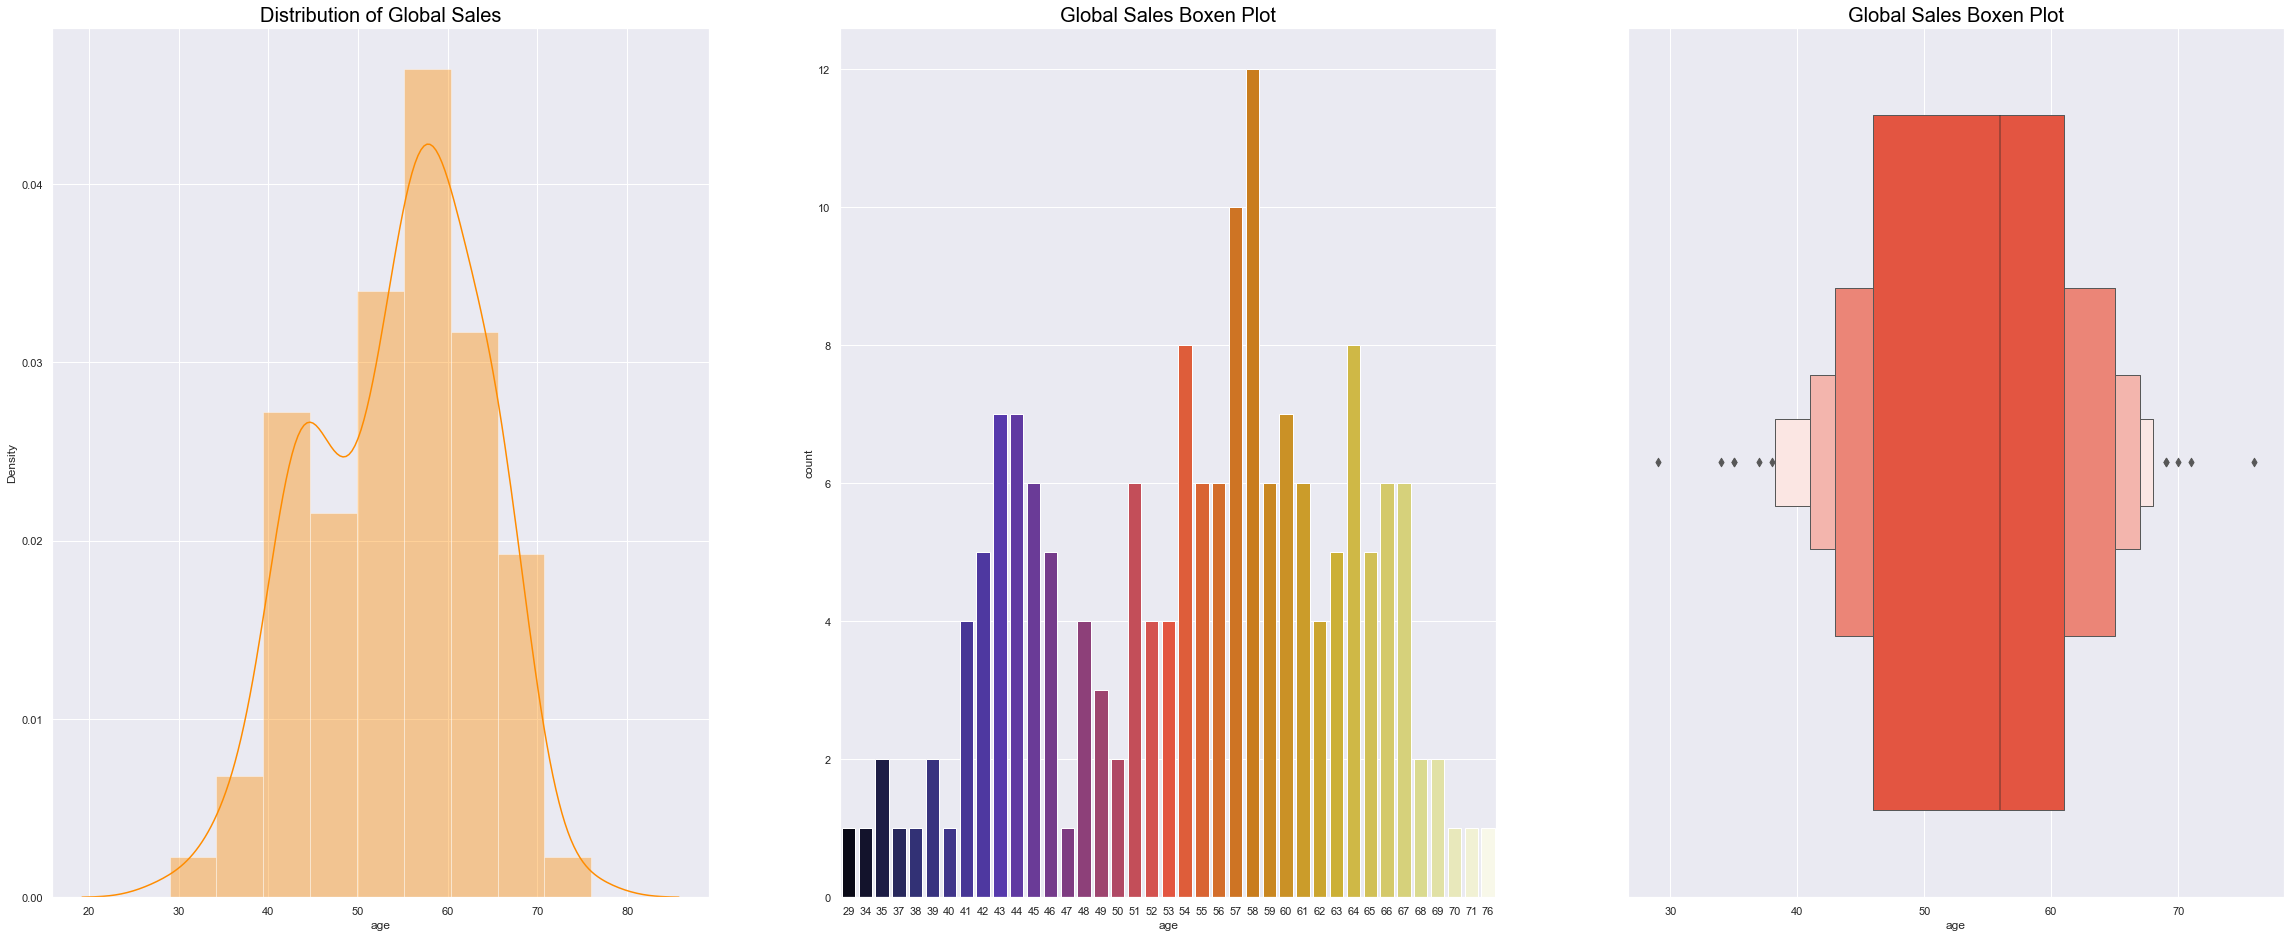

In [34]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.age, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["age"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["age"], palette='CMRmap')

#### Is Male

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='is_male', ylabel='Count'>

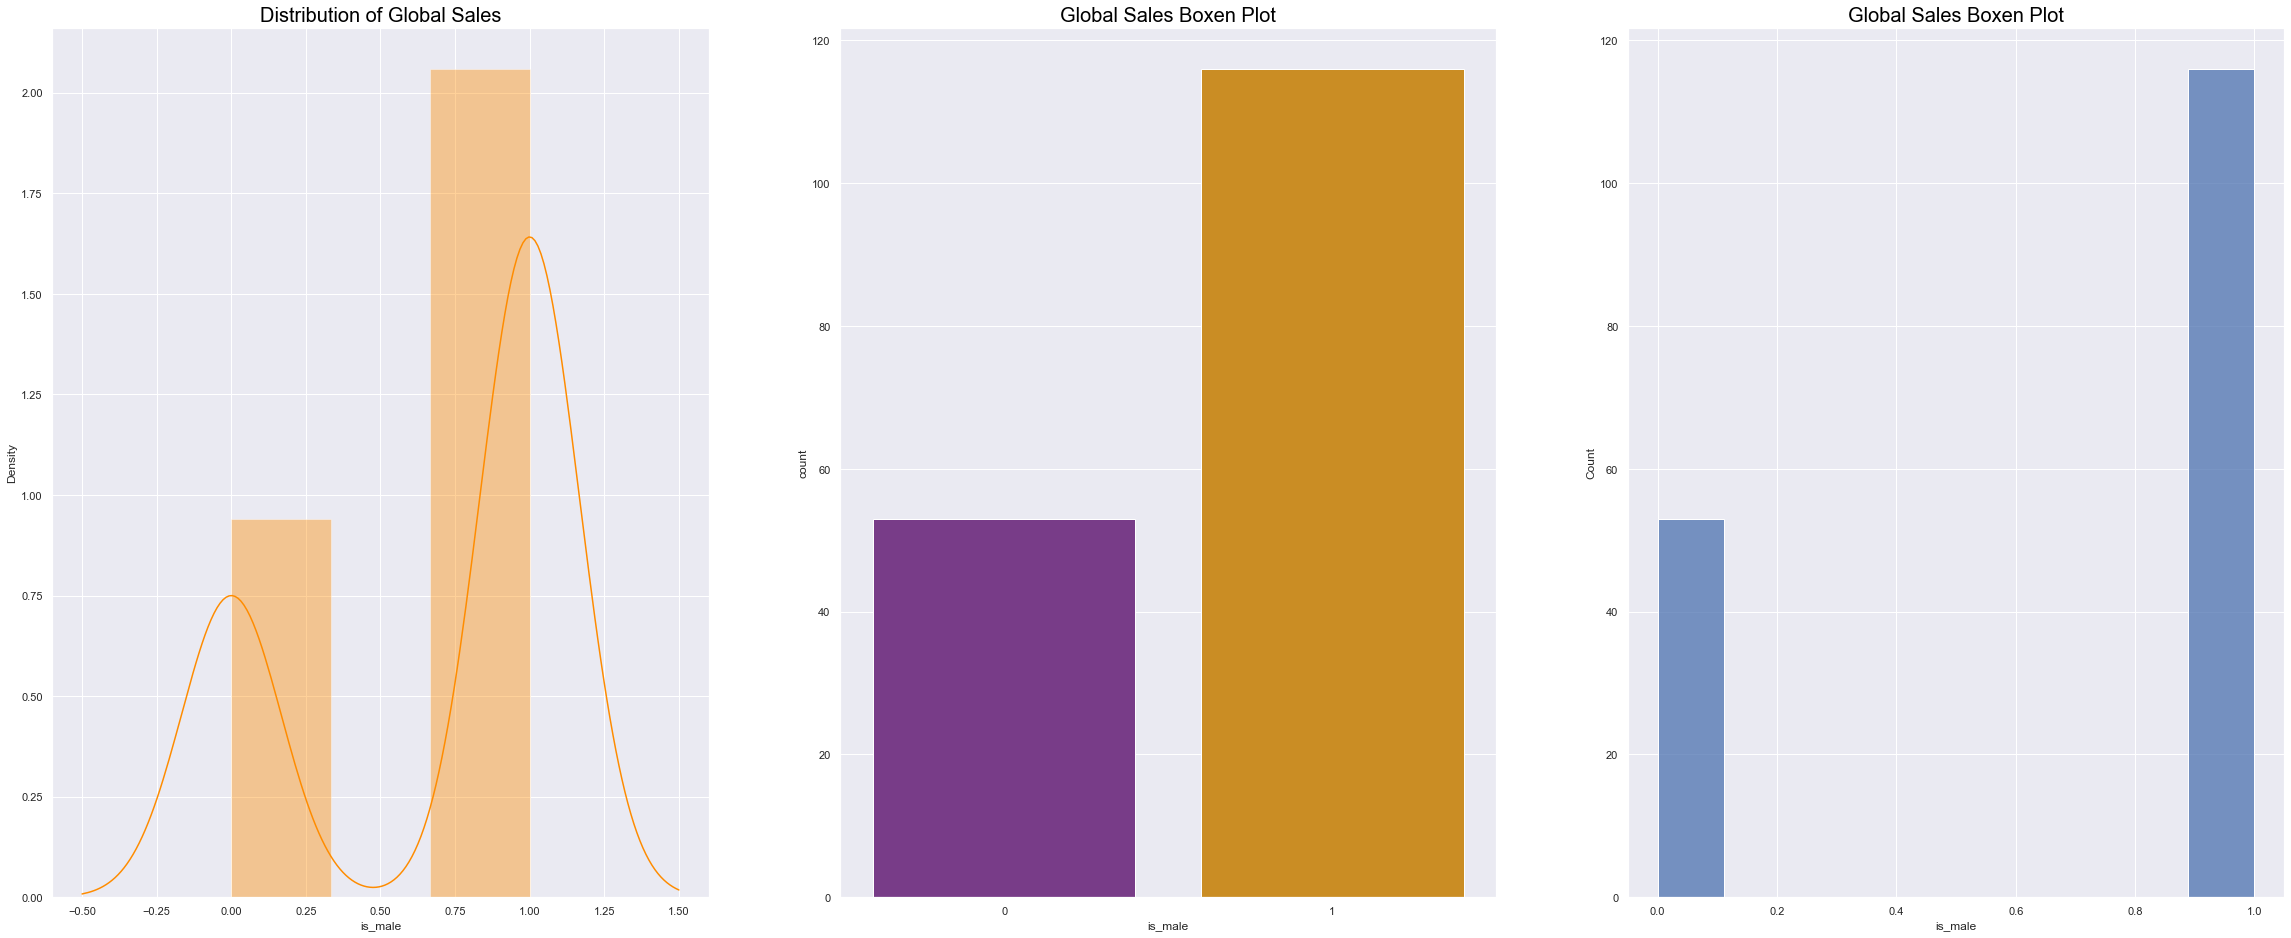

In [35]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.is_male, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["is_male"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(x=train["is_male"], palette='CMRmap')

#### Chet Pain

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='chest_pain', ylabel='count'>

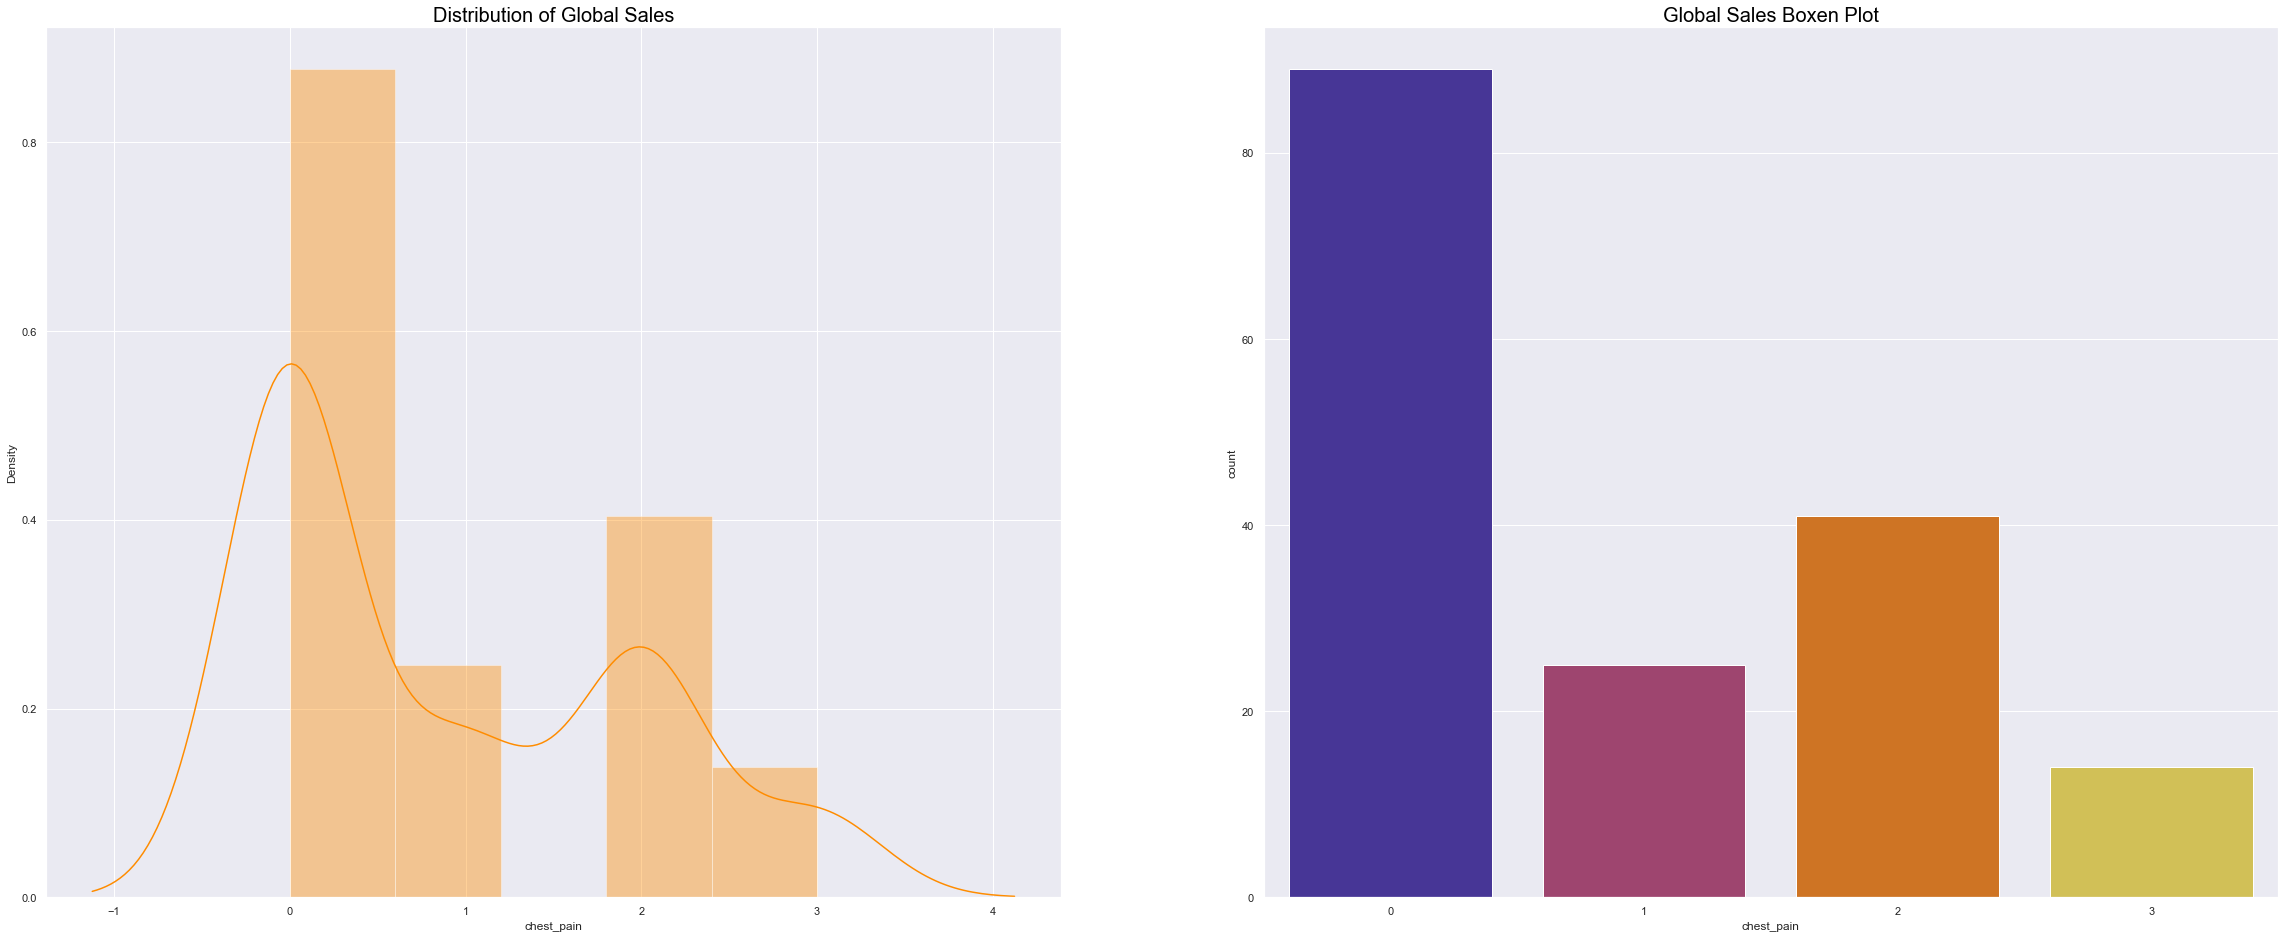

In [36]:
plt.subplots(1, 2, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.chest_pain, kde=True, color='darkorange')

plt.subplot(1,2,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["chest_pain"], palette='CMRmap')

#### Resting Blood Pressure

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='resting_bp'>

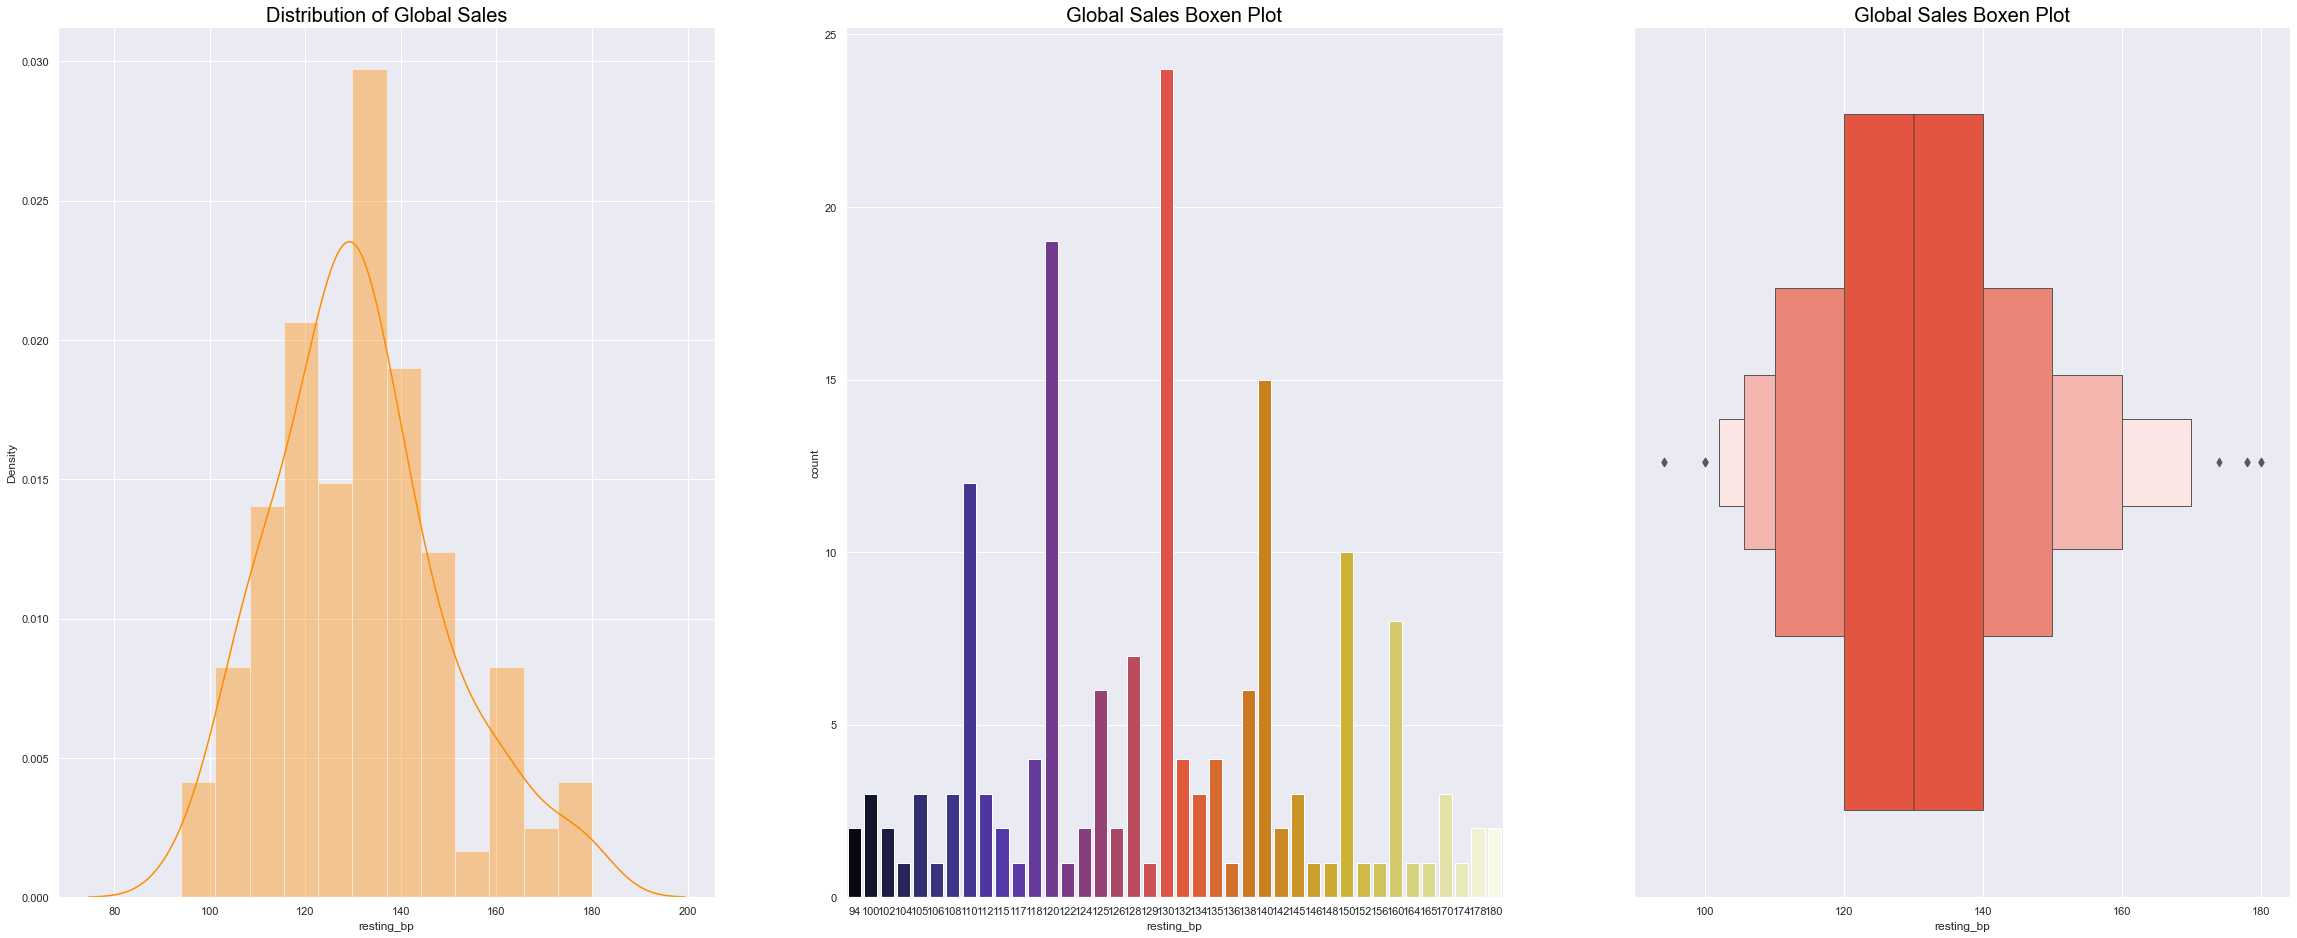

In [37]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.resting_bp, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["resting_bp"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["resting_bp"], palette='CMRmap')

#### Cholestoral

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='cholestoral'>

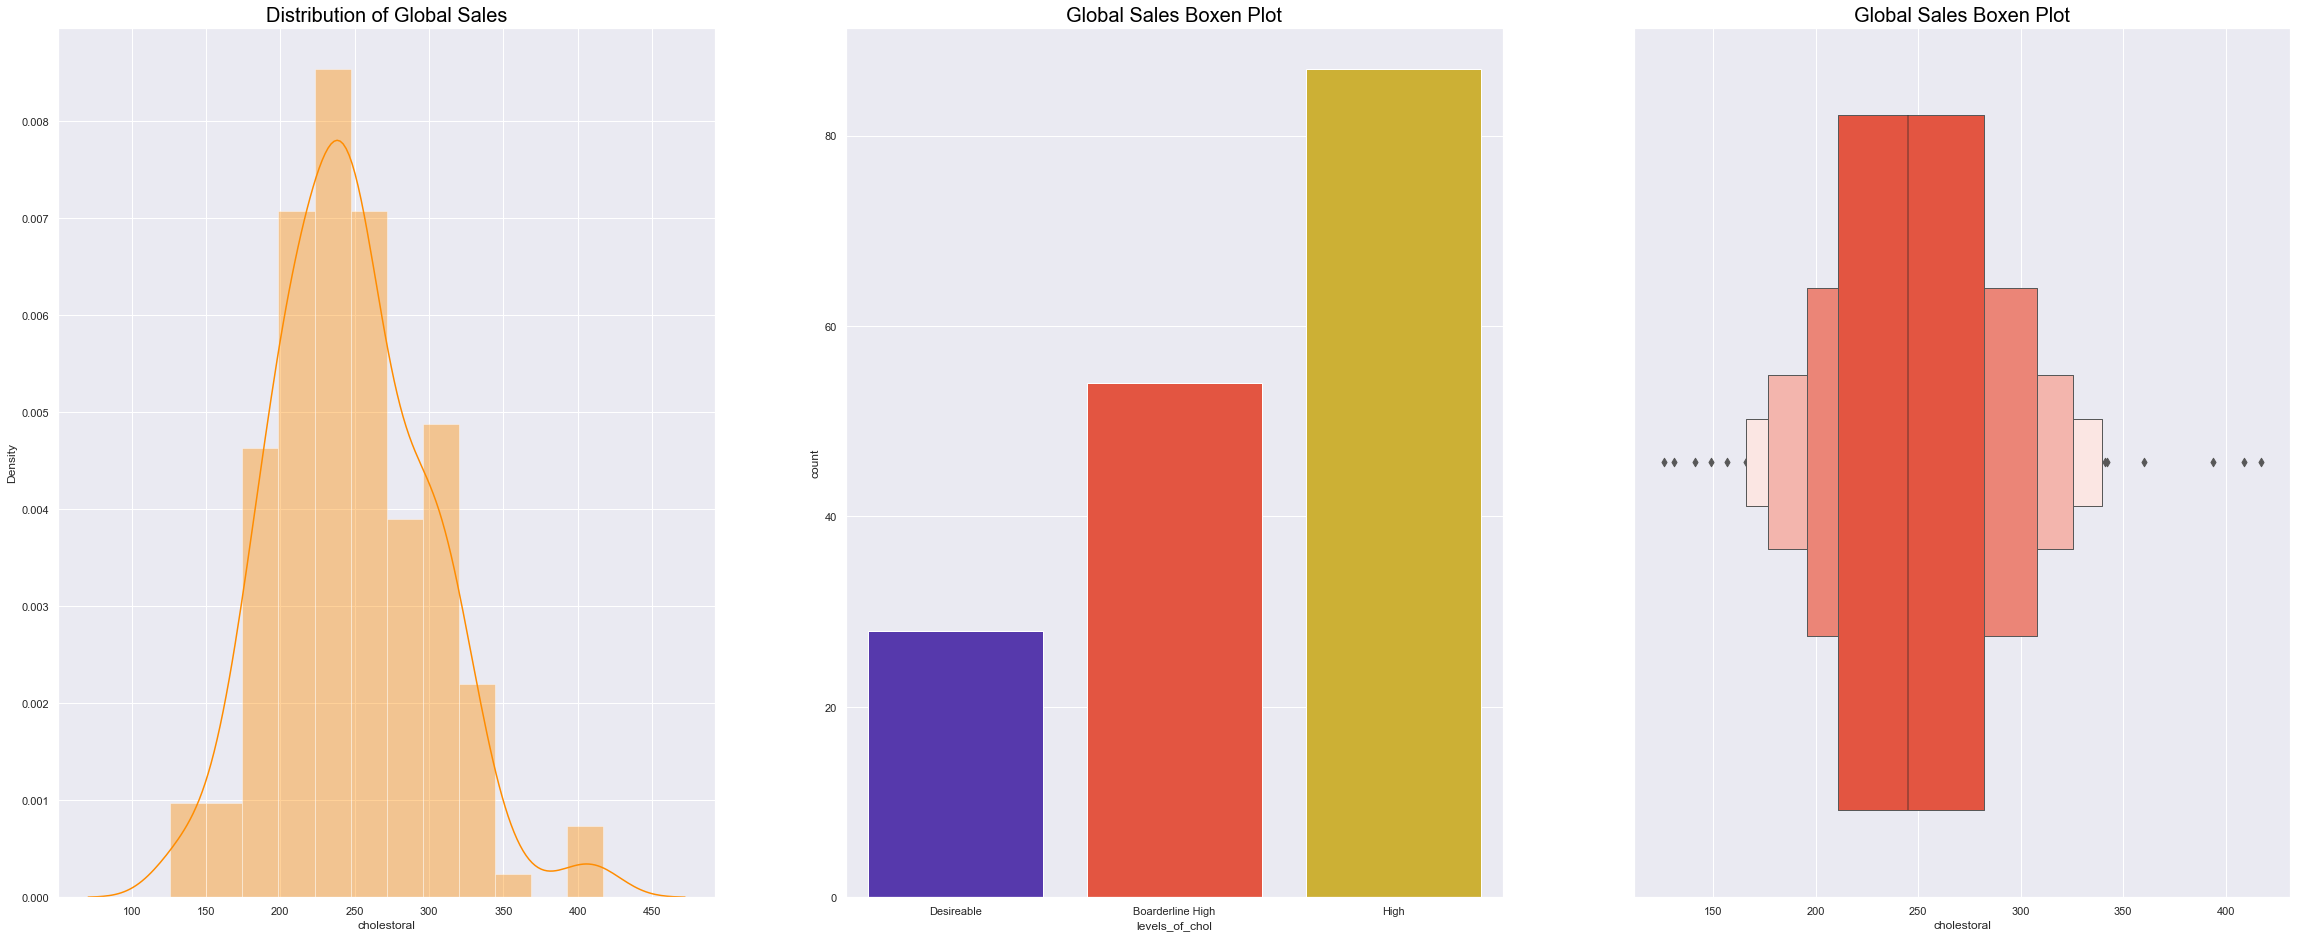

In [38]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.cholestoral, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["levels_of_chol"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["cholestoral"], palette='CMRmap')

#### Fasting Blood Sugar

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='blood_sugar_above_120'>

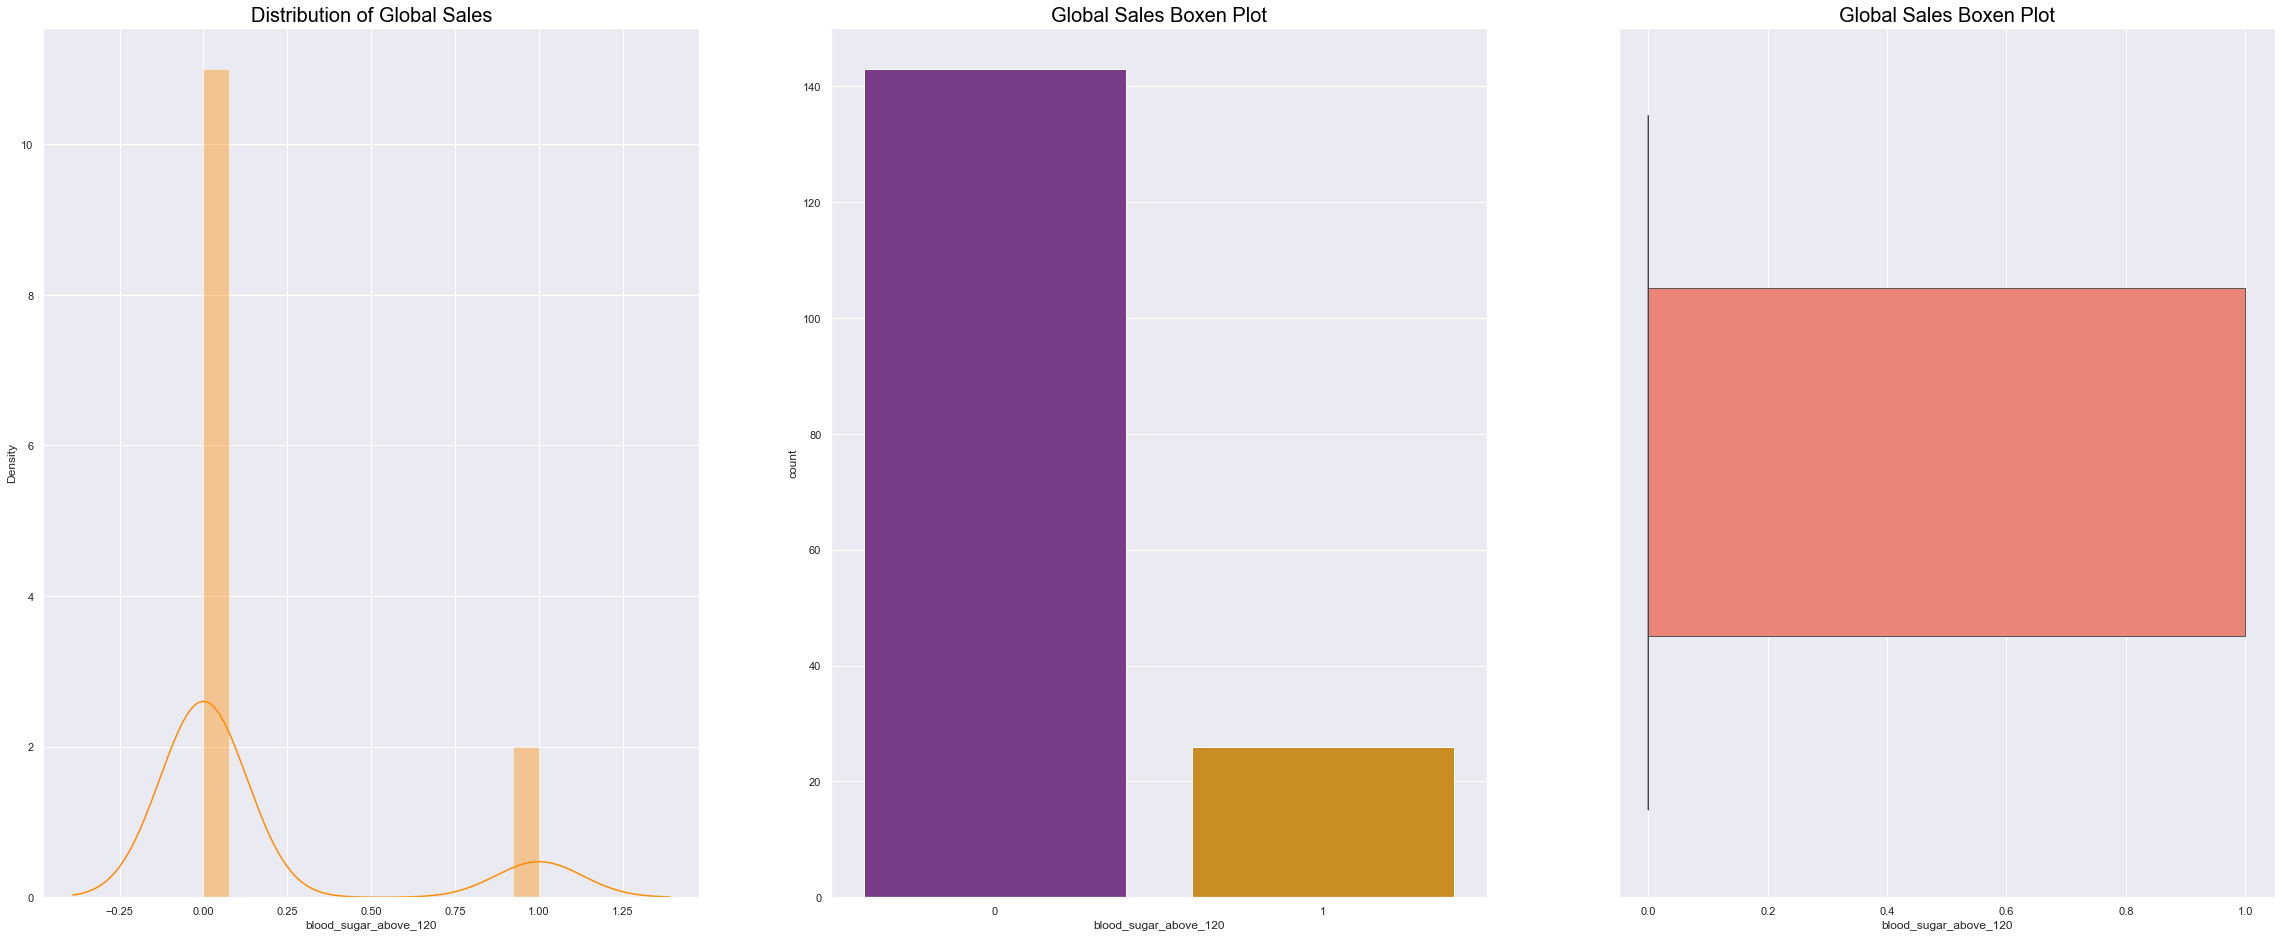

In [39]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.blood_sugar_above_120, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["blood_sugar_above_120"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["blood_sugar_above_120"], palette='CMRmap')

#### Resting Electocardio

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='resting_electocardio'>

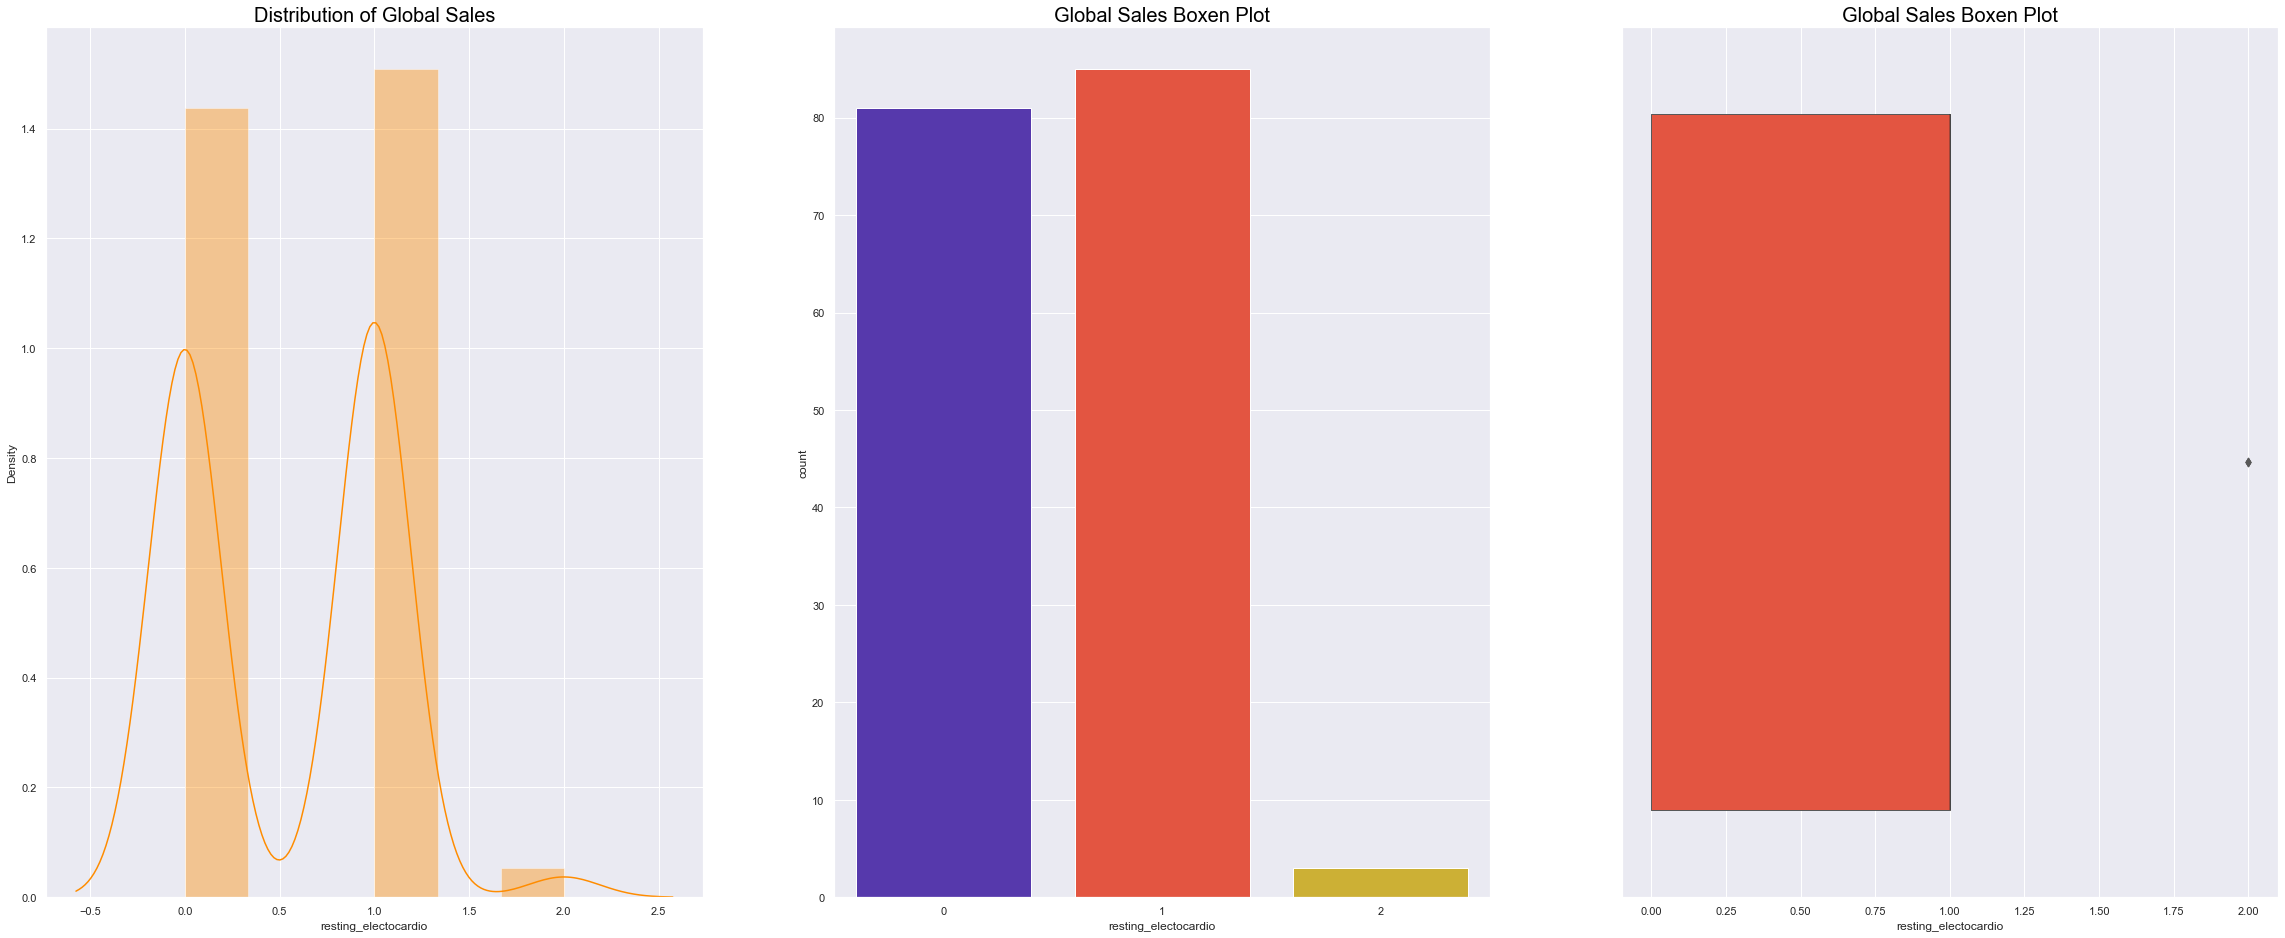

In [40]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.resting_electocardio, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["resting_electocardio"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["resting_electocardio"], palette='CMRmap')

#### Maximum Heart Rate

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='max_heart_rate'>

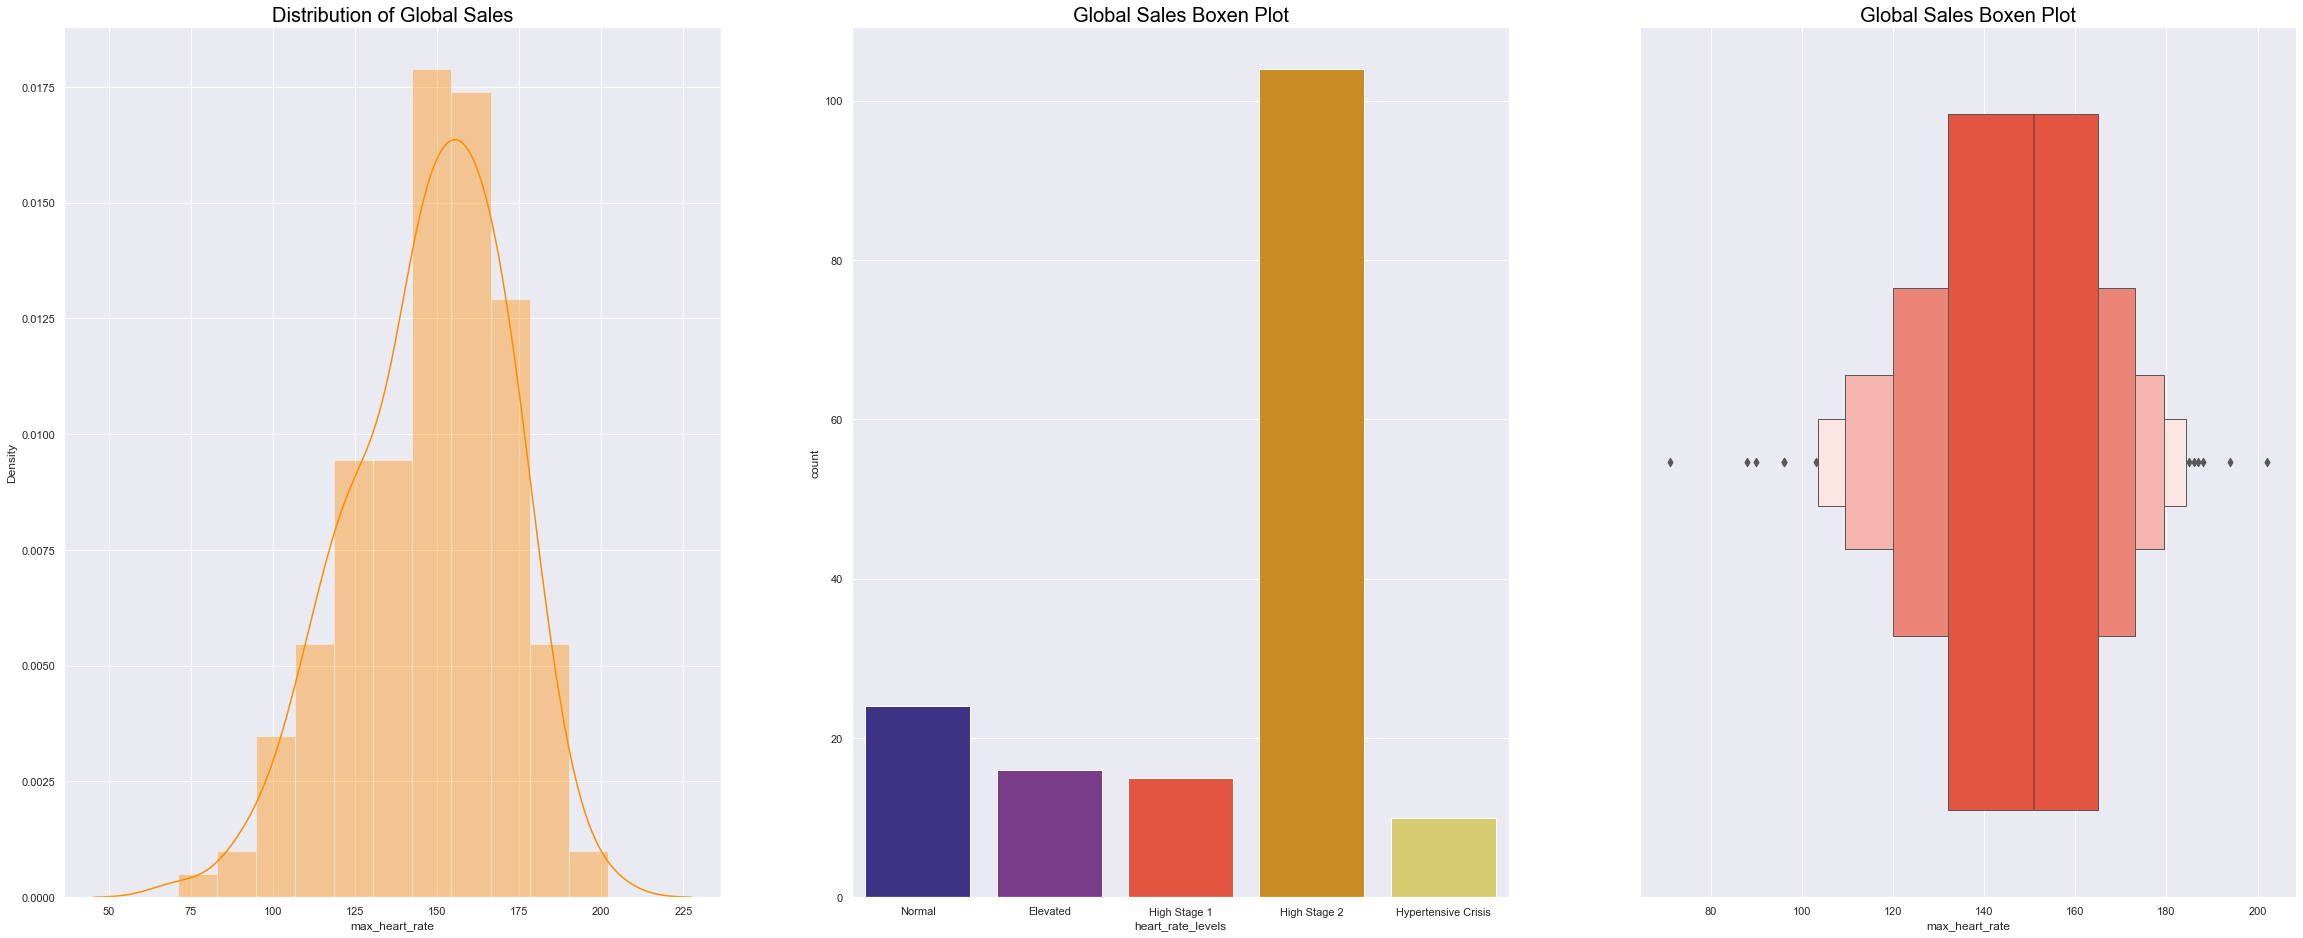

In [41]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.max_heart_rate, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["heart_rate_levels"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["max_heart_rate"], palette='CMRmap')

#### Exercise Induced Angina

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='exercise_angina'>

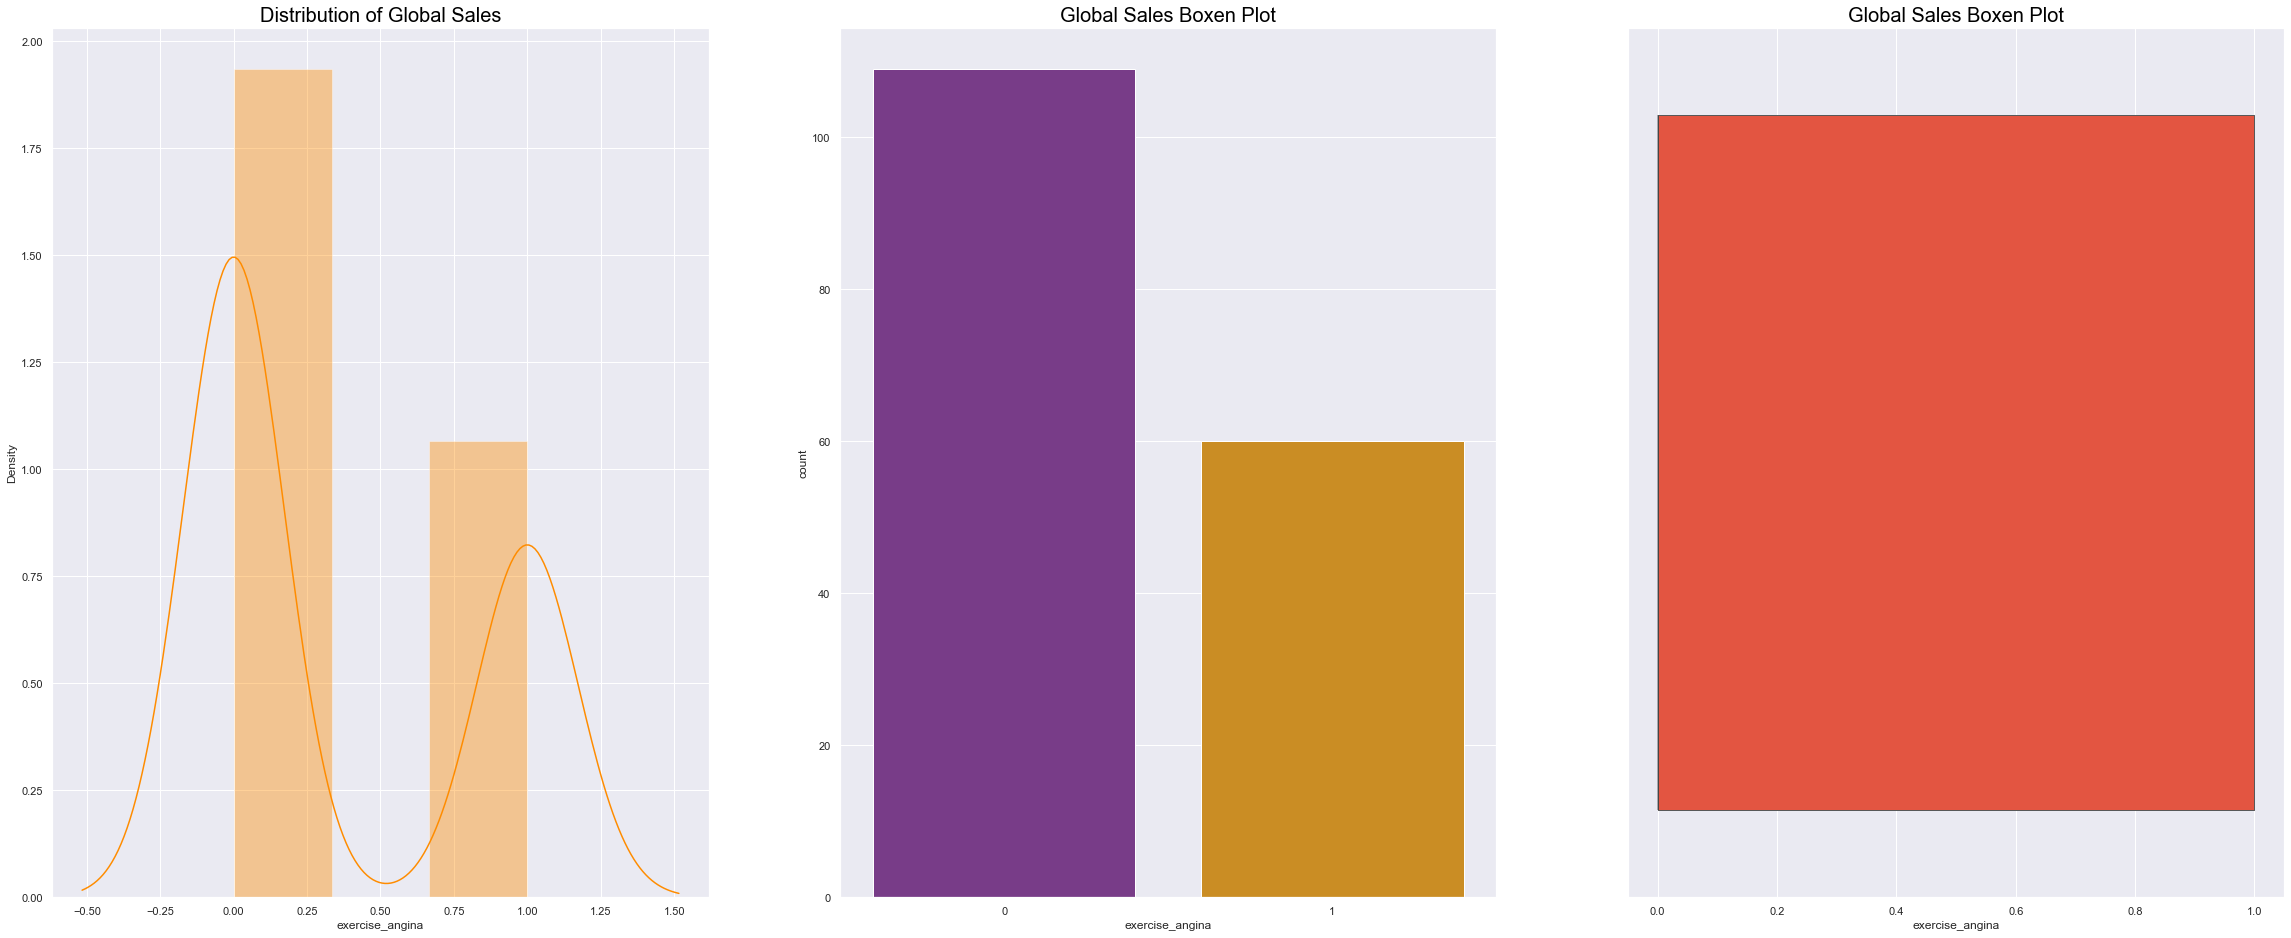

In [42]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.exercise_angina, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["exercise_angina"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["exercise_angina"], palette='CMRmap')

#### ST Depression

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='rest_angina'>

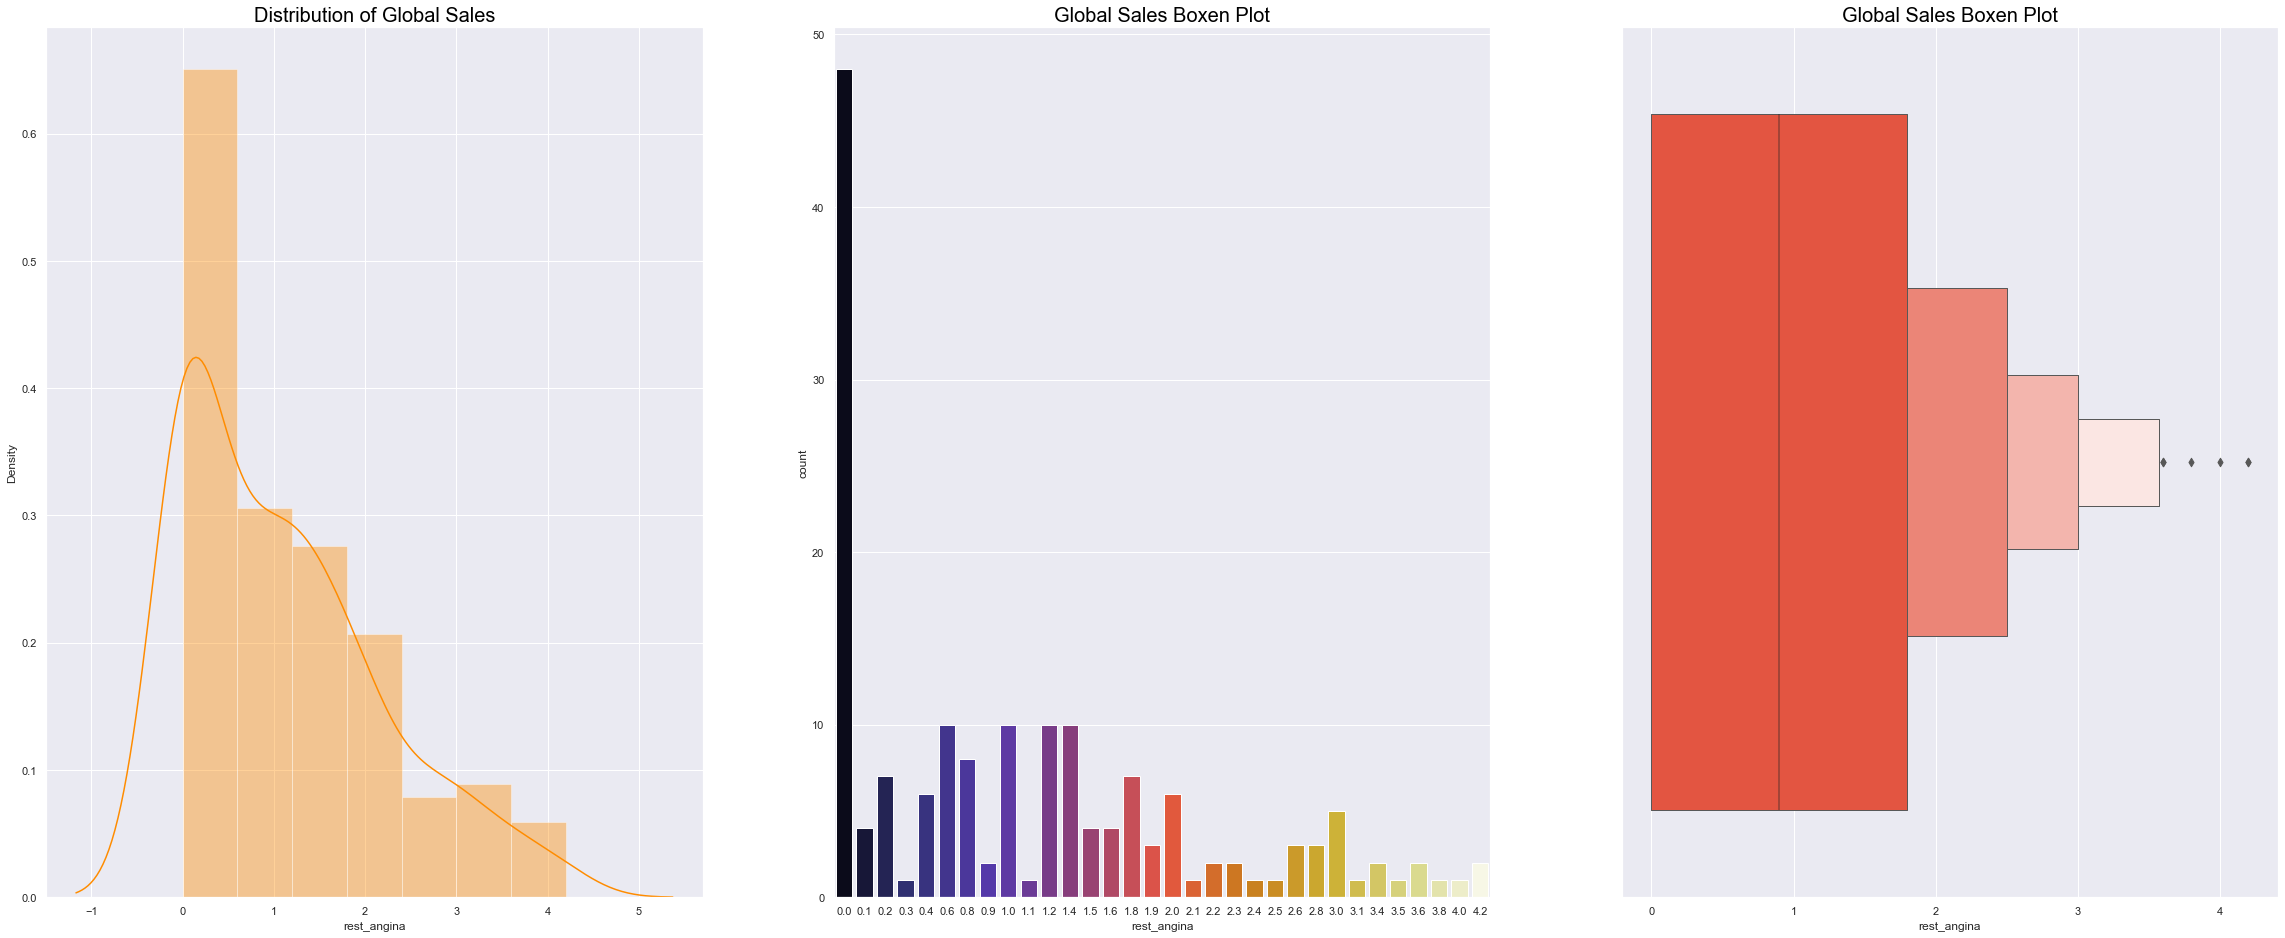

In [43]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.rest_angina, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["rest_angina"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["rest_angina"], palette='CMRmap')

#### Slope

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='slope'>

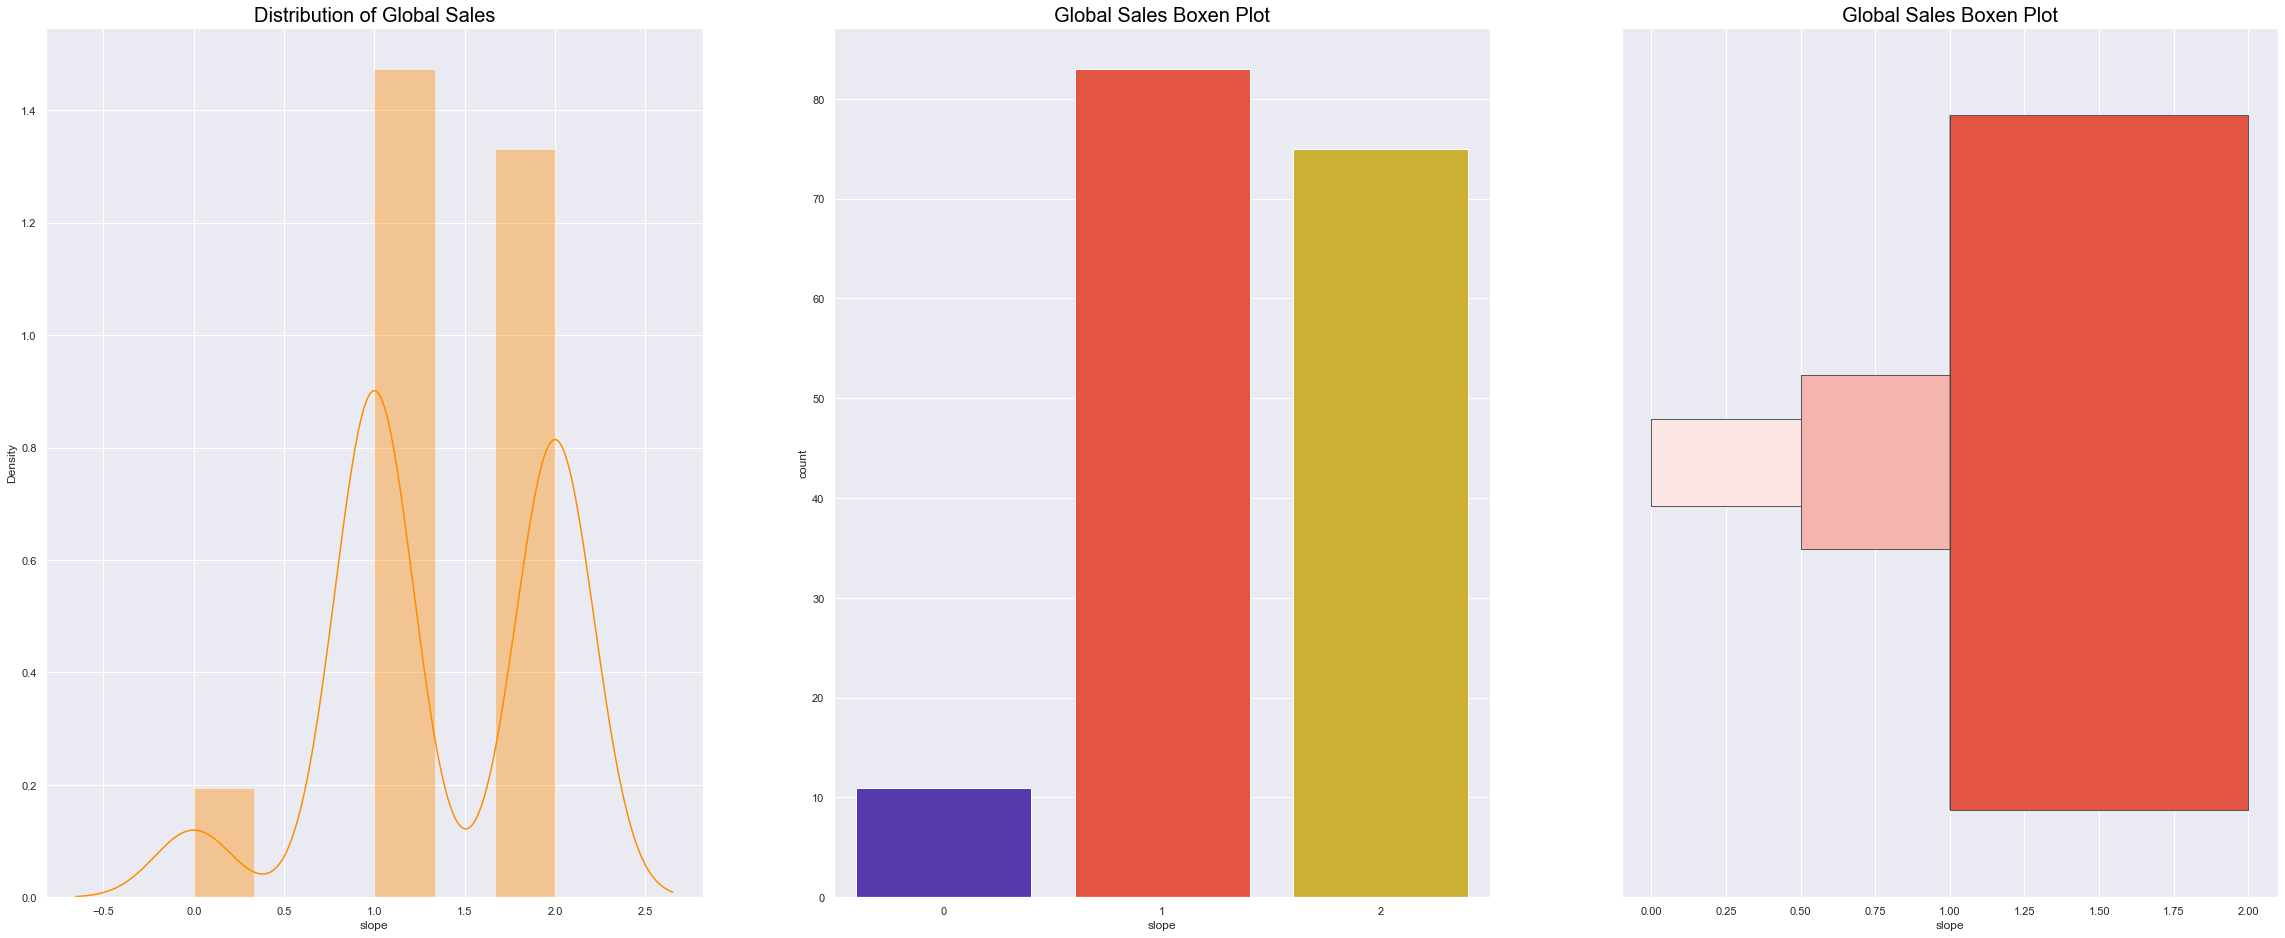

In [44]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.slope, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["slope"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["slope"], palette='CMRmap')

# Count of Major Vessels

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='count_major_vessels'>

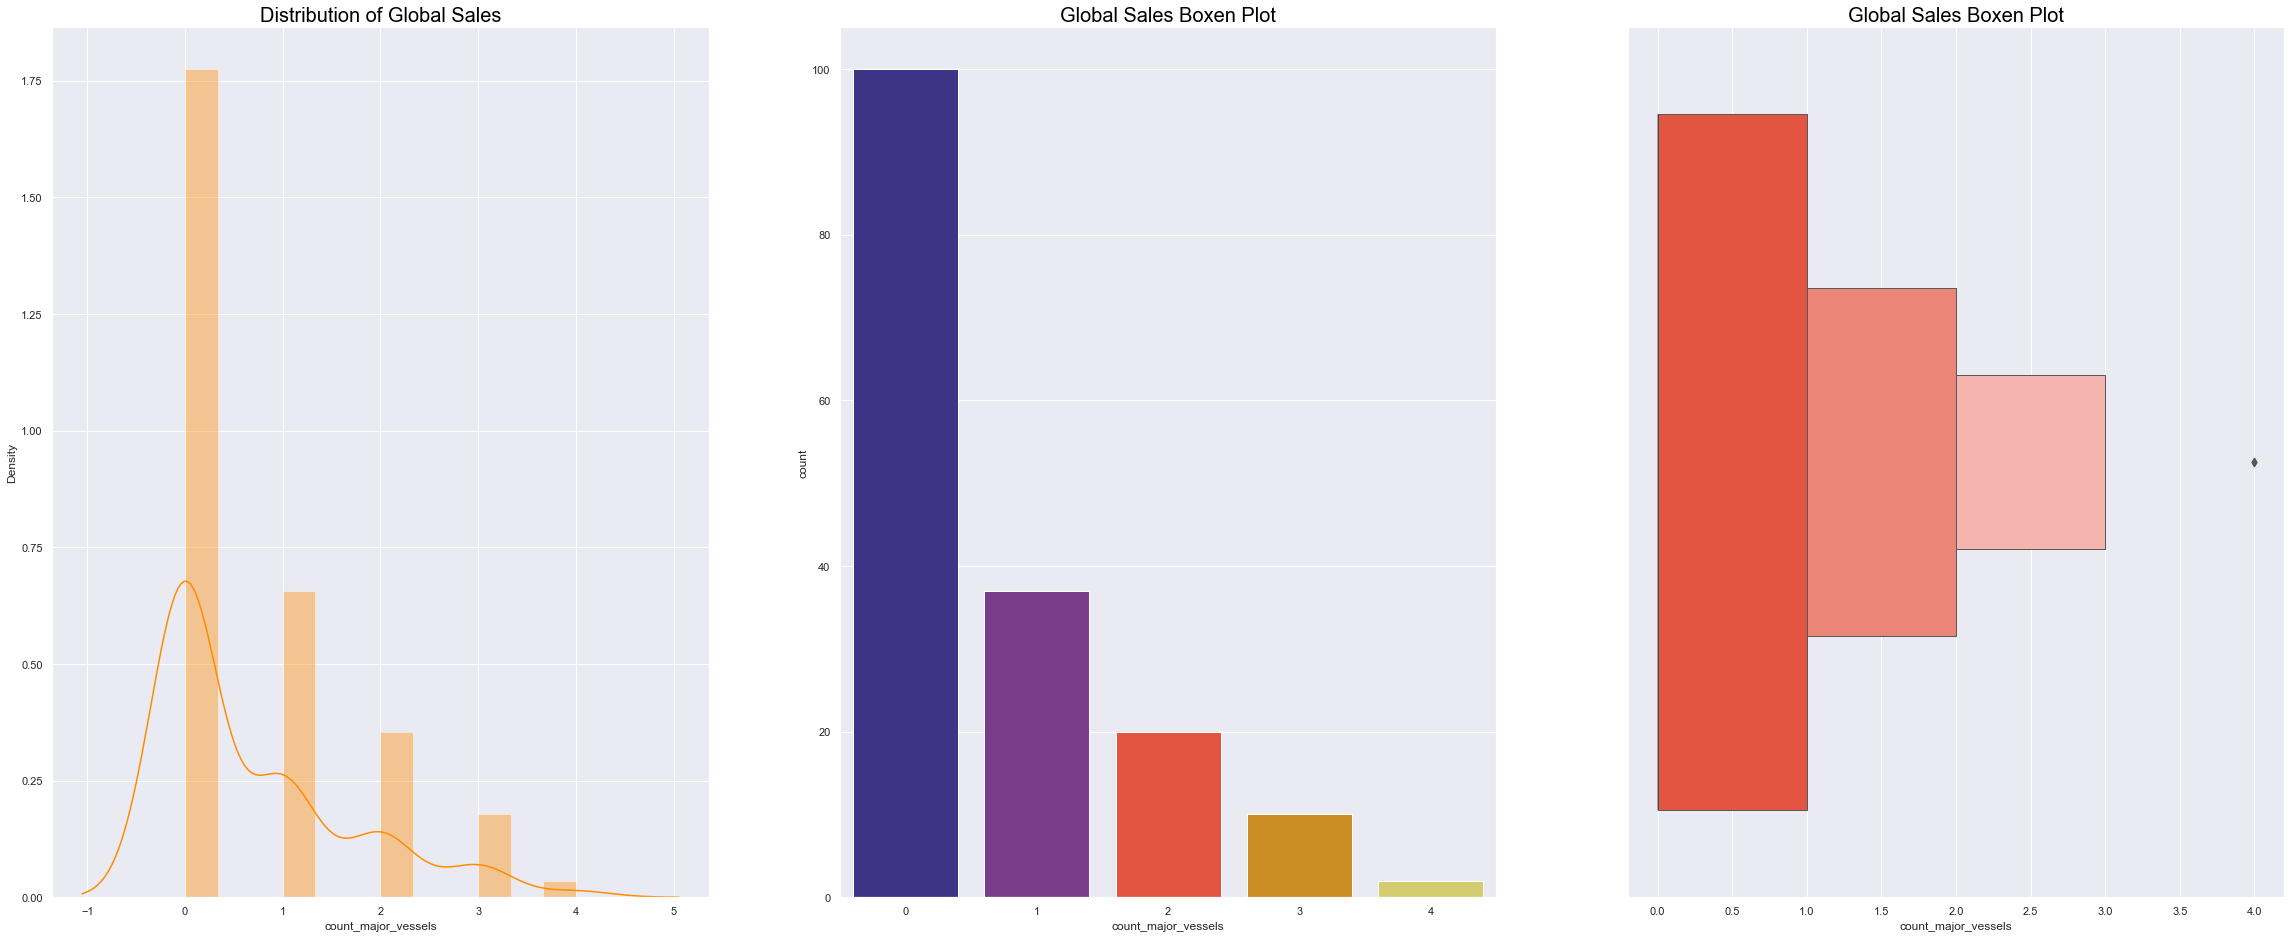

In [45]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.count_major_vessels, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["count_major_vessels"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["count_major_vessels"], palette='CMRmap')

## Type of Defect

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='defect_type'>

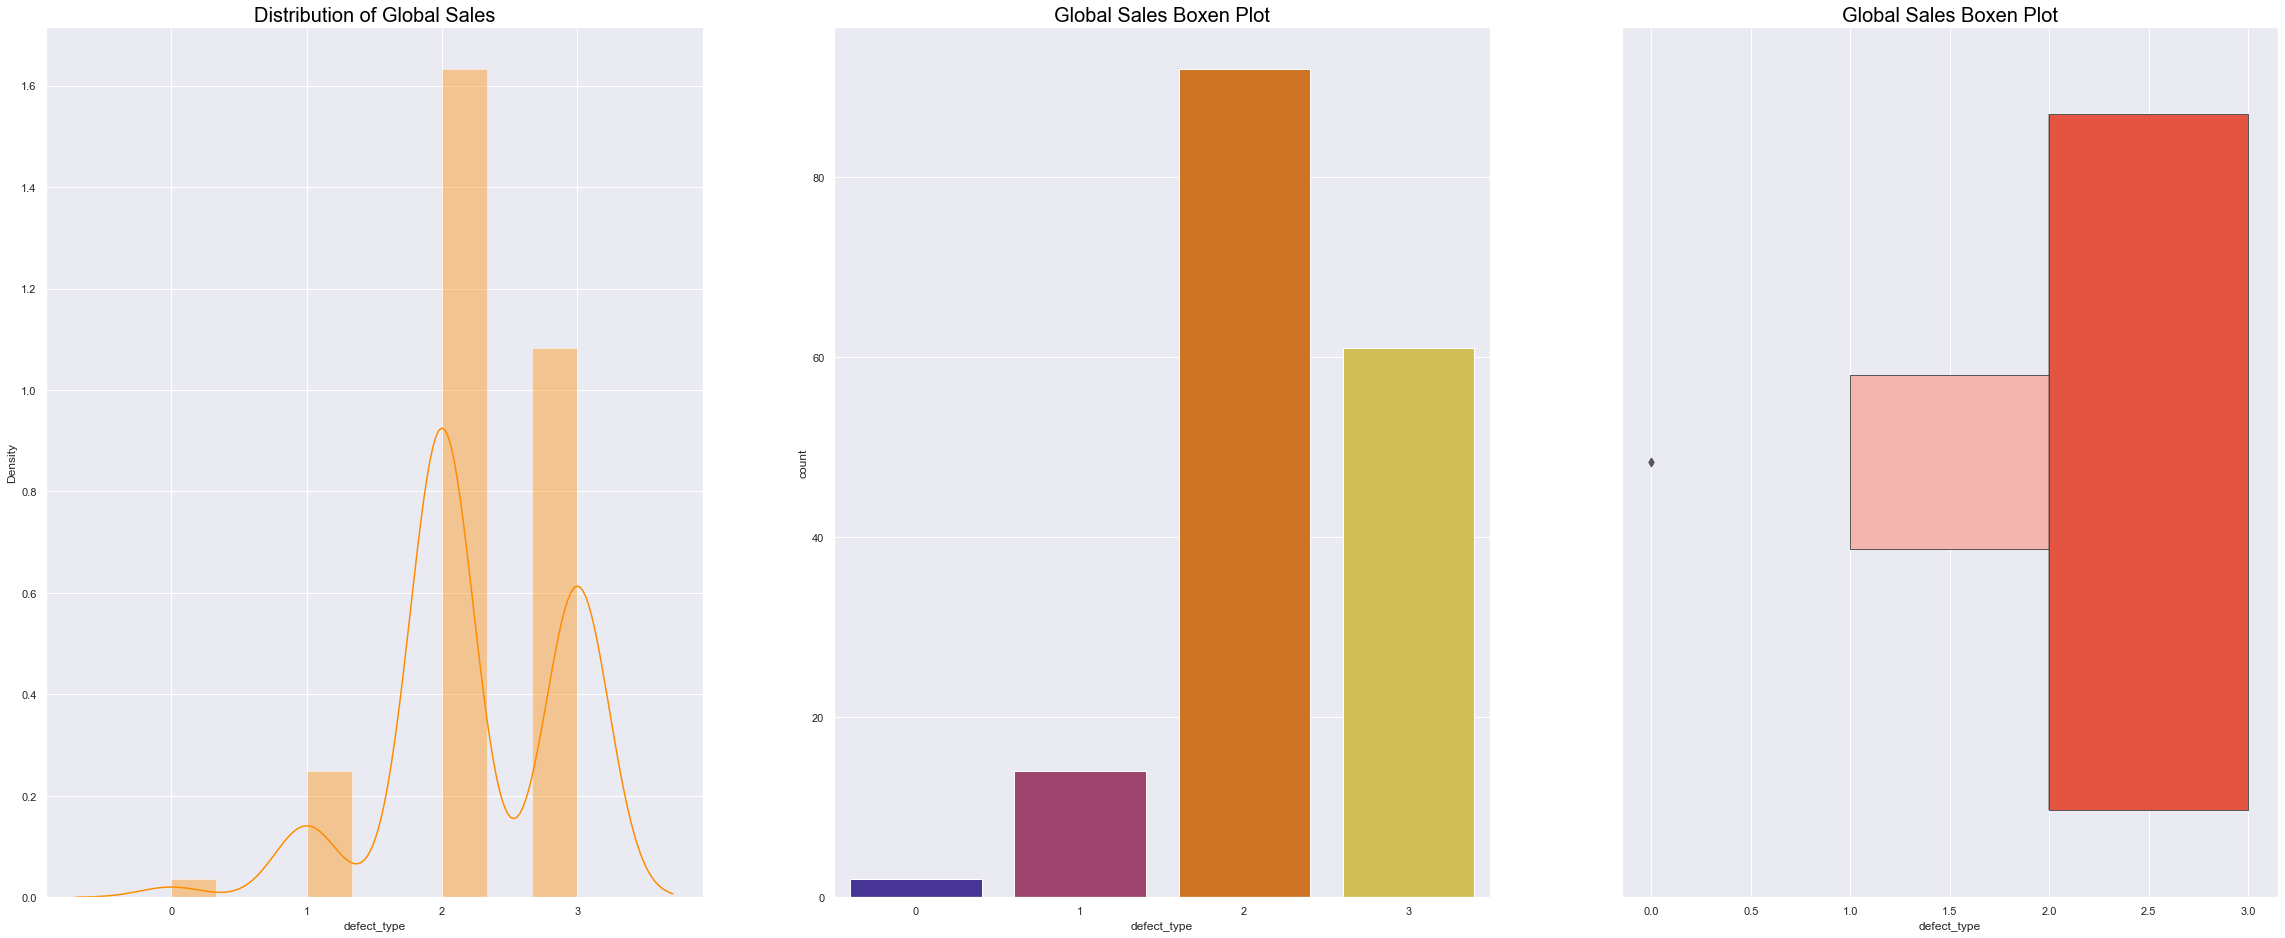

In [46]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.defect_type, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["defect_type"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["defect_type"], palette='CMRmap')

## Has a Heart Diseease

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='has_heart_disease'>

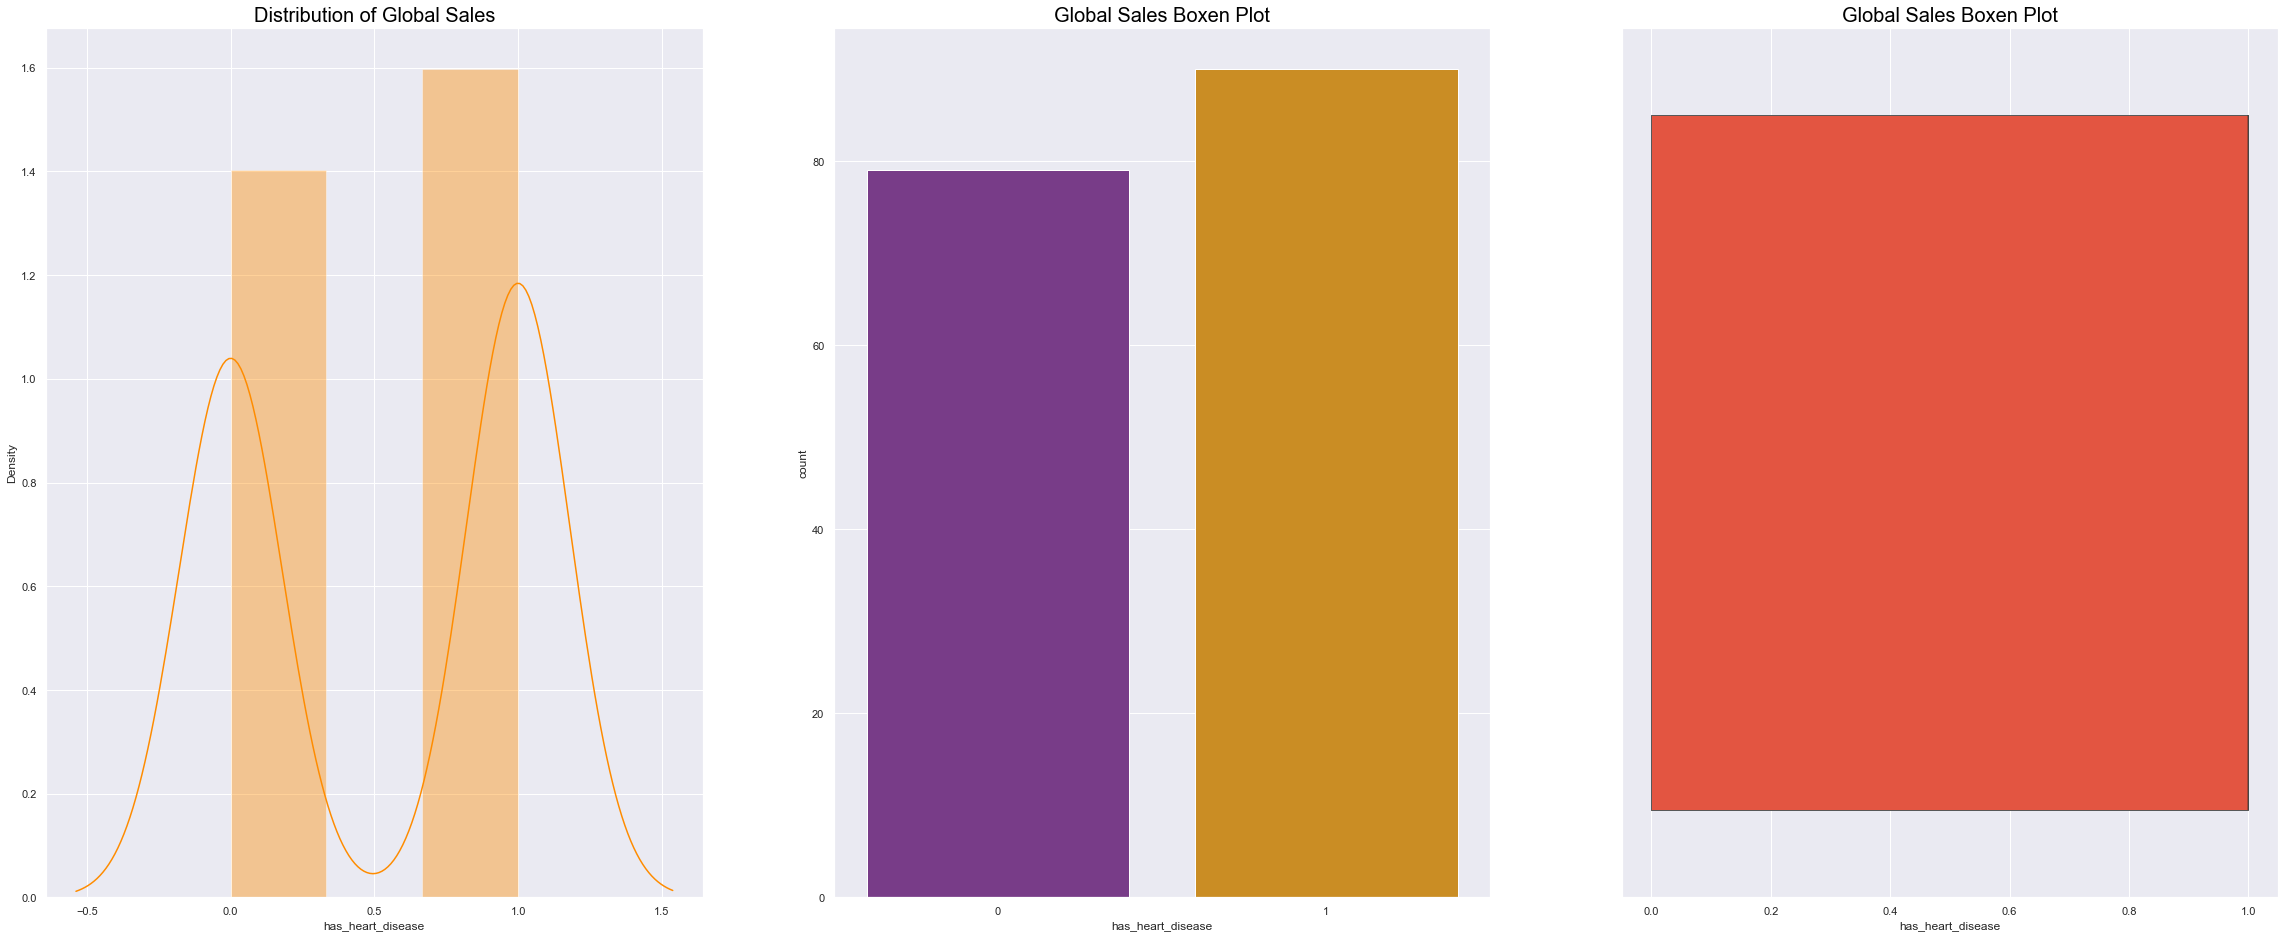

In [47]:
plt.subplots(1, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,3,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.has_heart_disease, kde=True, color='darkorange')

plt.subplot(1,3,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["has_heart_disease"], palette='CMRmap')

plt.subplot(1,3,3)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["has_heart_disease"], palette='CMRmap')

## Age groups

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='age_groups', ylabel='count'>

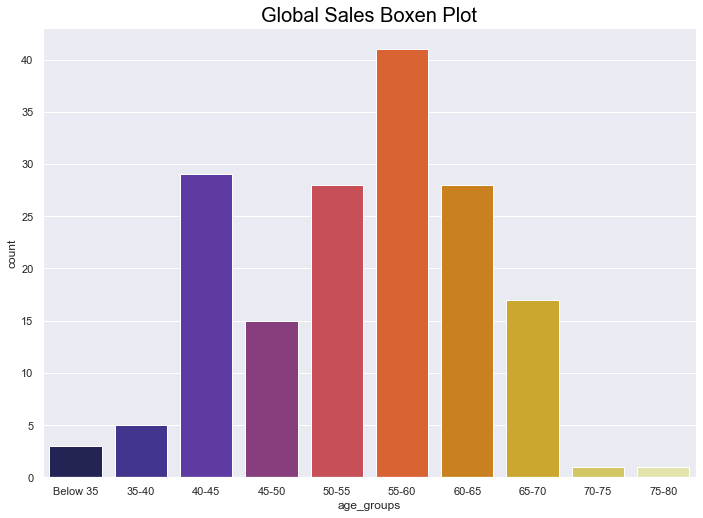

In [48]:
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["age_groups"], palette='CMRmap')

## Levels of Cholestoral

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='levels_of_chol', ylabel='count'>

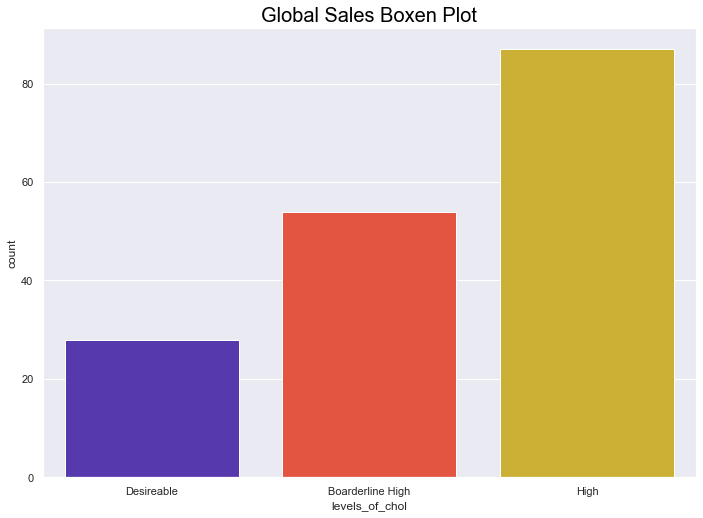

In [49]:
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["levels_of_chol"], palette='CMRmap')

## Heart Rate Levels 

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='heart_rate_levels', ylabel='count'>

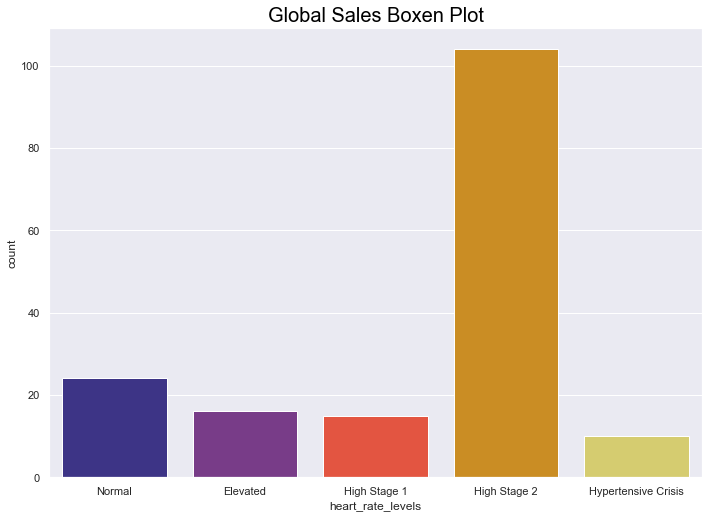

In [50]:
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x=train["heart_rate_levels"], palette='CMRmap')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    303 non-null    int64   
 1   is_male                303 non-null    int64   
 2   chest_pain             303 non-null    int64   
 3   resting_bp             303 non-null    int64   
 4   cholestoral            303 non-null    int64   
 5   blood_sugar_above_120  303 non-null    int64   
 6   resting_electocardio   303 non-null    int64   
 7   max_heart_rate         303 non-null    int64   
 8   exercise_angina        303 non-null    int64   
 9   rest_angina            303 non-null    float64 
 10  slope                  303 non-null    int64   
 11  count_major_vessels    303 non-null    int64   
 12  defect_type            303 non-null    int64   
 13  has_heart_disease      303 non-null    int64   
 14  chest_age_ratio        303 non-null    flo

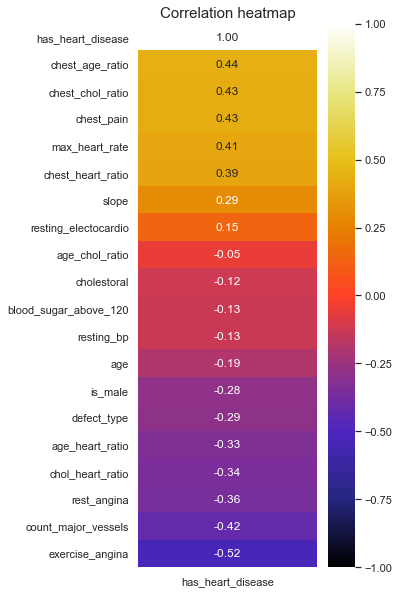

In [52]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['has_heart_disease'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -1, 
            vmax = 1, cmap = 'CMRmap')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()